<a href="https://colab.research.google.com/github/DiKachura/pattern_recognition_audio/blob/main/feature_extract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Объединение данных в датасет**

In [1]:
# Import libraries
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import seaborn as sns
import warnings
# ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
def path_name(folder, dir_list):
  '''
  Возвращает путь к файлу.

  Args:
      folder (str): Путь к папке с файлами.
      dir_list (list): Список файлов.
  '''
  path = []
  for i in dir_list:
    path.append(folder + i)
  return path

In [3]:

SAVEE = '/content/drive/MyDrive/SAVEE/ALL/'
RAV = '/content/drive/MyDrive/RAVDESS/audio_speech_actors_01-24/'
TESS = "/content/drive/MyDrive/TESS/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/"
CREMA = "/content/drive/MyDrive/CREMA-D/AudioWAV/"
cars = '/content/drive/MyDrive/cars/'
VTS = '/content/drive/MyDrive/VTS/vehicle_type_sound_dataset/cutted_files/'
animals = '/content/drive/MyDrive/animals/'
cats = '/content/drive/MyDrive/cats_sound/'
dogs = '/content/drive/MyDrive/dog_sound/'
drones = '/content/drive/MyDrive/drones/'


In [4]:
savee_dir_list = os.listdir(SAVEE)
rav_dir_list = os.listdir(RAV)
tess_dir_list = os.listdir(TESS)
crema_dir_list = os.listdir(CREMA)
cars_dir_list = os.listdir(cars)
vts_dir_list = os.listdir(VTS)
animals_dir_list = os.listdir(animals)
cats_dir_list = os.listdir(cats)
dogs_dir_list = os.listdir(dogs)
drones_dir_list = os.listdir(drones)

In [5]:
savee_path = path_name(SAVEE, savee_dir_list)
crema_path = path_name(CREMA, crema_dir_list)
cars_path = path_name(cars, cars_dir_list)
vts_path = path_name(VTS, vts_dir_list)
animals_path = path_name(animals, animals_dir_list)
cats_path = path_name(cats, cats_dir_list)
dogs_path = path_name(dogs, dogs_dir_list)
drones_path = path_name(drones, drones_dir_list)

In [6]:
savee_data = pd.DataFrame(savee_path, columns=['path'])
savee_data['label'] = 'human'
savee_data

path  label
0     /content/drive/MyDrive/SAVEE/ALL/DC_a03.wav  human
1     /content/drive/MyDrive/SAVEE/ALL/DC_a04.wav  human
2     /content/drive/MyDrive/SAVEE/ALL/DC_a01.wav  human
3     /content/drive/MyDrive/SAVEE/ALL/DC_a05.wav  human
4     /content/drive/MyDrive/SAVEE/ALL/DC_a02.wav  human
..                                            ...    ...
475  /content/drive/MyDrive/SAVEE/ALL/KL_su14.wav  human
476  /content/drive/MyDrive/SAVEE/ALL/KL_su09.wav  human
477  /content/drive/MyDrive/SAVEE/ALL/KL_su10.wav  human
478  /content/drive/MyDrive/SAVEE/ALL/KL_su11.wav  human
479  /content/drive/MyDrive/SAVEE/ALL/KL_su06.wav  human

[480 rows x 2 columns]

In [7]:
RAV = '/content/drive/MyDrive/RAVDESS/audio_speech_actors_01-24/'

dir_list = os.listdir(RAV)
path = []
for i in dir_list:
    fname = os.listdir(RAV + i)
    for f in fname:
        path.append(RAV + i + '/' + f)
rav_data = pd.DataFrame(path, columns=['path'])
rav_data['label'] = 'human'
rav_data

path  label
0     /content/drive/MyDrive/RAVDESS/audio_speech_ac...  human
1     /content/drive/MyDrive/RAVDESS/audio_speech_ac...  human
2     /content/drive/MyDrive/RAVDESS/audio_speech_ac...  human
3     /content/drive/MyDrive/RAVDESS/audio_speech_ac...  human
4     /content/drive/MyDrive/RAVDESS/audio_speech_ac...  human
...                                                 ...    ...
1435  /content/drive/MyDrive/RAVDESS/audio_speech_ac...  human
1436  /content/drive/MyDrive/RAVDESS/audio_speech_ac...  human
1437  /content/drive/MyDrive/RAVDESS/audio_speech_ac...  human
1438  /content/drive/MyDrive/RAVDESS/audio_speech_ac...  human
1439  /content/drive/MyDrive/RAVDESS/audio_speech_ac...  human

[1440 rows x 2 columns]

In [8]:
TESS = "/content/drive/MyDrive/TESS/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/"

dir_list = os.listdir(TESS)
path = []
for i in dir_list:
    fname = os.listdir(TESS + i)
    for f in fname:
        path.append(TESS + i + '/' + f)
tess_data = pd.DataFrame(path, columns=['path'])
tess_data['label'] = 'human'
tess_data

path  label
0     /content/drive/MyDrive/TESS/TESS Toronto emoti...  human
1     /content/drive/MyDrive/TESS/TESS Toronto emoti...  human
2     /content/drive/MyDrive/TESS/TESS Toronto emoti...  human
3     /content/drive/MyDrive/TESS/TESS Toronto emoti...  human
4     /content/drive/MyDrive/TESS/TESS Toronto emoti...  human
...                                                 ...    ...
2795  /content/drive/MyDrive/TESS/TESS Toronto emoti...  human
2796  /content/drive/MyDrive/TESS/TESS Toronto emoti...  human
2797  /content/drive/MyDrive/TESS/TESS Toronto emoti...  human
2798  /content/drive/MyDrive/TESS/TESS Toronto emoti...  human
2799  /content/drive/MyDrive/TESS/TESS Toronto emoti...  human

[2800 rows x 2 columns]

In [9]:
crema_data = pd.DataFrame(crema_path, columns=['path'])
crema_data['label'] = 'human'
crema_data

path  label
0     /content/drive/MyDrive/CREMA-D/AudioWAV/1079_T...  human
1     /content/drive/MyDrive/CREMA-D/AudioWAV/1079_T...  human
2     /content/drive/MyDrive/CREMA-D/AudioWAV/1079_T...  human
3     /content/drive/MyDrive/CREMA-D/AudioWAV/1079_T...  human
4     /content/drive/MyDrive/CREMA-D/AudioWAV/1079_T...  human
...                                                 ...    ...
7437  /content/drive/MyDrive/CREMA-D/AudioWAV/1006_I...  human
7438  /content/drive/MyDrive/CREMA-D/AudioWAV/1006_I...  human
7439  /content/drive/MyDrive/CREMA-D/AudioWAV/1006_I...  human
7440  /content/drive/MyDrive/CREMA-D/AudioWAV/1006_I...  human
7441  /content/drive/MyDrive/CREMA-D/AudioWAV/1006_I...  human

[7442 rows x 2 columns]

In [10]:
cars_data = pd.DataFrame(cars_path, columns=['path'])
cars_data['label'] = 'car'
cars_data

path label
0       /content/drive/MyDrive/cars/VehicleNoise798.wav   car
1       /content/drive/MyDrive/cars/VehicleNoise801.wav   car
2         /content/drive/MyDrive/cars/VehicleNoise8.wav   car
3     /content/drive/MyDrive/cars/VehicleNoise802_se...   car
4     /content/drive/MyDrive/cars/VehicleNoise802_se...   car
...                                                 ...   ...
2919  /content/drive/MyDrive/cars/Nissan 2012 Murano...   car
2920  /content/drive/MyDrive/cars/Nissan 2012 Rogue ...   car
2921  /content/drive/MyDrive/cars/Nissan 2016 Maxima...   car
2922  /content/drive/MyDrive/cars/Nissan Altima 2.5 ...   car
2923  /content/drive/MyDrive/cars/Nissan Altima 2.5 ...   car

[2924 rows x 2 columns]

In [11]:
vts_data = pd.DataFrame(vts_path, columns=['path'])
vts_data['label'] = 'car'
vts_data

path label
0     /content/drive/MyDrive/VTS/vehicle_type_sound_...   car
1     /content/drive/MyDrive/VTS/vehicle_type_sound_...   car
2     /content/drive/MyDrive/VTS/vehicle_type_sound_...   car
3     /content/drive/MyDrive/VTS/vehicle_type_sound_...   car
4     /content/drive/MyDrive/VTS/vehicle_type_sound_...   car
...                                                 ...   ...
1700  /content/drive/MyDrive/VTS/vehicle_type_sound_...   car
1701  /content/drive/MyDrive/VTS/vehicle_type_sound_...   car
1702  /content/drive/MyDrive/VTS/vehicle_type_sound_...   car
1703  /content/drive/MyDrive/VTS/vehicle_type_sound_...   car
1704  /content/drive/MyDrive/VTS/vehicle_type_sound_...   car

[1705 rows x 2 columns]

In [12]:
animals_data = pd.DataFrame(animals_path, columns=['path'])
animals_data['label'] = 'animal'
animals_data

path   label
0     /content/drive/MyDrive/animals/78957_segment_6...  animal
1     /content/drive/MyDrive/animals/78957_segment_7...  animal
2     /content/drive/MyDrive/animals/78957_segment_8...  animal
3     /content/drive/MyDrive/animals/78957_segment_9...  animal
4     /content/drive/MyDrive/animals/78957_segment_1...  animal
...                                                 ...     ...
1292  /content/drive/MyDrive/animals/78957_segment_1...  animal
1293  /content/drive/MyDrive/animals/78957_segment_2...  animal
1294  /content/drive/MyDrive/animals/78957_segment_3...  animal
1295  /content/drive/MyDrive/animals/78957_segment_4...  animal
1296  /content/drive/MyDrive/animals/78957_segment_5...  animal

[1297 rows x 2 columns]

In [13]:
cats_data = pd.DataFrame(cats_path, columns=['path'])
cats_data['label'] = 'animal'
cats_data

path   label
0    /content/drive/MyDrive/cats_sound/audio_segmen...  animal
1    /content/drive/MyDrive/cats_sound/audio_segmen...  animal
2    /content/drive/MyDrive/cats_sound/audio_segmen...  animal
3    /content/drive/MyDrive/cats_sound/audio_segmen...  animal
4    /content/drive/MyDrive/cats_sound/audio_segmen...  animal
..                                                 ...     ...
648  /content/drive/MyDrive/cats_sound/audio_segmen...  animal
649  /content/drive/MyDrive/cats_sound/audio_segmen...  animal
650  /content/drive/MyDrive/cats_sound/audio_segmen...  animal
651  /content/drive/MyDrive/cats_sound/audio_segmen...  animal
652  /content/drive/MyDrive/cats_sound/audio_segmen...  animal

[653 rows x 2 columns]

In [14]:
dogs_data = pd.DataFrame(dogs_path, columns=['path'])
dogs_data['label'] = 'animal'
dogs_data

path   label
0    /content/drive/MyDrive/dog_sound/audio_segment...  animal
1    /content/drive/MyDrive/dog_sound/audio_segment...  animal
2    /content/drive/MyDrive/dog_sound/audio_segment...  animal
3    /content/drive/MyDrive/dog_sound/audio_segment...  animal
4    /content/drive/MyDrive/dog_sound/audio_segment...  animal
..                                                 ...     ...
134  /content/drive/MyDrive/dog_sound/audio_segment...  animal
135  /content/drive/MyDrive/dog_sound/audio_segment...  animal
136  /content/drive/MyDrive/dog_sound/audio_segment...  animal
137  /content/drive/MyDrive/dog_sound/audio_segment...  animal
138  /content/drive/MyDrive/dog_sound/.ipynb_checkp...  animal

[139 rows x 2 columns]

In [15]:
drones_data = pd.DataFrame(drones_path, columns=['path'])
drones_data['label'] = 'drone'
drones_data

path  label
0     /content/drive/MyDrive/drones/1_segment_443.wav  drone
1     /content/drive/MyDrive/drones/1_segment_444.wav  drone
2     /content/drive/MyDrive/drones/1_segment_445.wav  drone
3     /content/drive/MyDrive/drones/1_segment_446.wav  drone
4     /content/drive/MyDrive/drones/1_segment_447.wav  drone
...                                               ...    ...
1763  /content/drive/MyDrive/drones/1_segment_438.wav  drone
1764  /content/drive/MyDrive/drones/1_segment_439.wav  drone
1765  /content/drive/MyDrive/drones/1_segment_440.wav  drone
1766  /content/drive/MyDrive/drones/1_segment_441.wav  drone
1767  /content/drive/MyDrive/drones/1_segment_442.wav  drone

[1768 rows x 2 columns]

In [16]:
data = pd.concat([savee_data, rav_data, tess_data, crema_data, cars_data, vts_data, animals_data, cats_data, dogs_data, drones_data])
data

path  label
0         /content/drive/MyDrive/SAVEE/ALL/DC_a03.wav  human
1         /content/drive/MyDrive/SAVEE/ALL/DC_a04.wav  human
2         /content/drive/MyDrive/SAVEE/ALL/DC_a01.wav  human
3         /content/drive/MyDrive/SAVEE/ALL/DC_a05.wav  human
4         /content/drive/MyDrive/SAVEE/ALL/DC_a02.wav  human
...                                               ...    ...
1763  /content/drive/MyDrive/drones/1_segment_438.wav  drone
1764  /content/drive/MyDrive/drones/1_segment_439.wav  drone
1765  /content/drive/MyDrive/drones/1_segment_440.wav  drone
1766  /content/drive/MyDrive/drones/1_segment_441.wav  drone
1767  /content/drive/MyDrive/drones/1_segment_442.wav  drone

[20648 rows x 2 columns]

In [17]:
data['label'].value_counts()

label
human     12162
car        4629
animal     2089
drone      1768
Name: count, dtype: int64

**Балансировка данных**

**Undersampling большинства:**

In [18]:
from sklearn.utils import resample

# Подвыборка большинства без повторения
human_undersampled = resample(data[data['label'] == 'human'],
                             replace=False,
                             n_samples=4000,
                             random_state=42)

balanced_data = pd.concat([human_undersampled,
                          data[data['label'] == 'car'],
                          data[data['label'] == 'animal'],
                          data[data['label'] == 'drone']])

In [19]:
balanced_data['label'].value_counts()

label
car       4629
human     4000
animal    2089
drone     1768
Name: count, dtype: int64

**Анализ аудиоданных**

In [ ]:
audio_data = '/content/drive/MyDrive/drones/1_segment_1.wav'

audio_data_human = '/content/drive/MyDrive/SAVEE/ALL/DC_a01.wav'

audio_data_animals = '/content/drive/MyDrive/animals/23301_segment_1.wav'

audio_data_cars = '/content/drive/MyDrive/cars/2008 Ford Edge Engine knocking..wav'

In [ ]:
y, sr = librosa.load(audio_data)
print(y.shape, sr)

y_human, sr_human = librosa.load(audio_data_human)
print(y_human.shape, sr_human)

y_animals, sr_animals = librosa.load(audio_data_animals)
print(y_animals.shape, sr_animals)

y_cars, sr_cars = librosa.load(audio_data_cars)
print(y_cars.shape, sr_cars)

(110250,) 22050
(80434,) 22050
(110250,) 22050
(110250,) 22050


In [ ]:
print(y, sr)

[ 0.          0.          0.         ... -0.09151709 -0.11802022
 -0.18545589] 22050


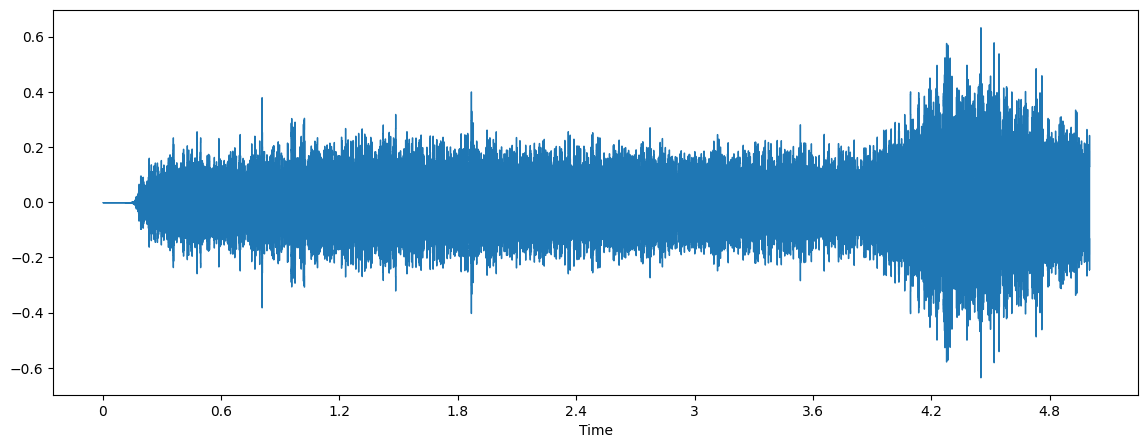

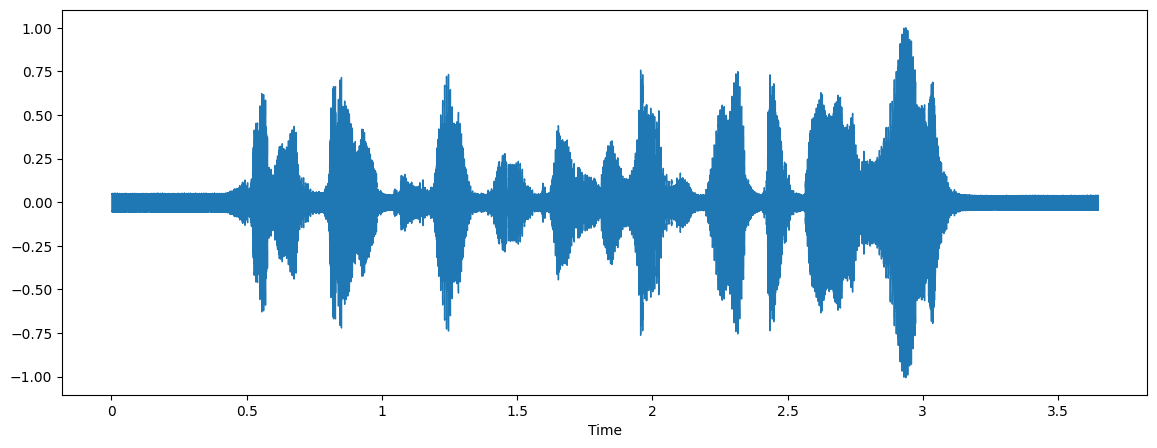

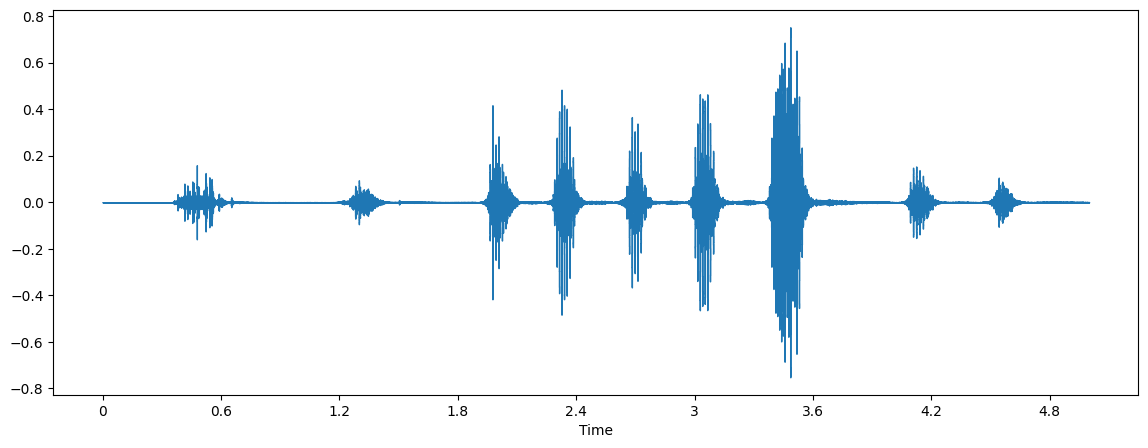

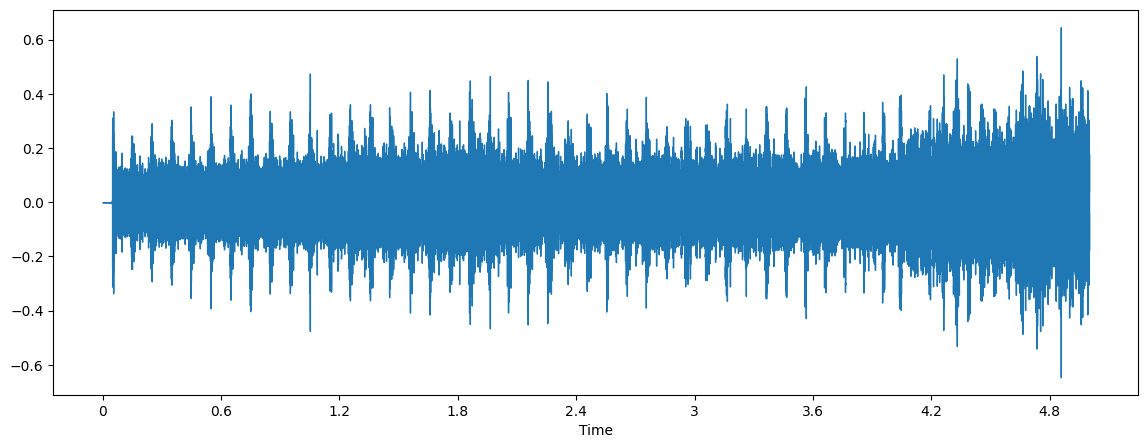

In [ ]:
def load_audio(y, sr, audio_data):
  plt.figure(figsize=(14, 5))
  librosa.display.waveshow(y, sr=sr)
  ipd.Audio(audio_data)

load_audio(y, sr, audio_data)
load_audio(y_human, sr_human, audio_data_human)
load_audio(y_animals, sr_animals, audio_data_animals)
load_audio(y_cars, sr_cars, audio_data_cars)

**Разделение гармонических (тональных ) и ударных (переходных) сигналов на две формы волны:**

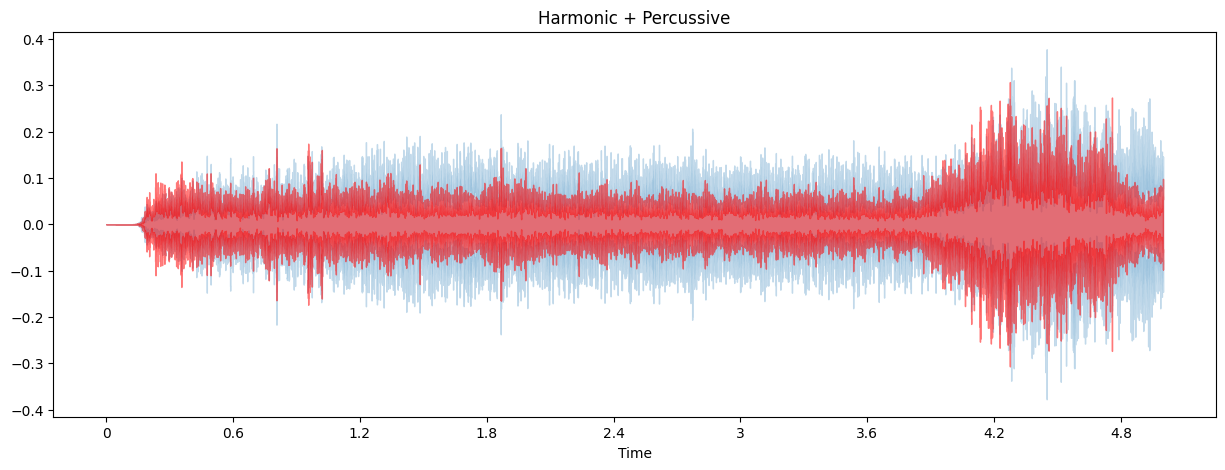

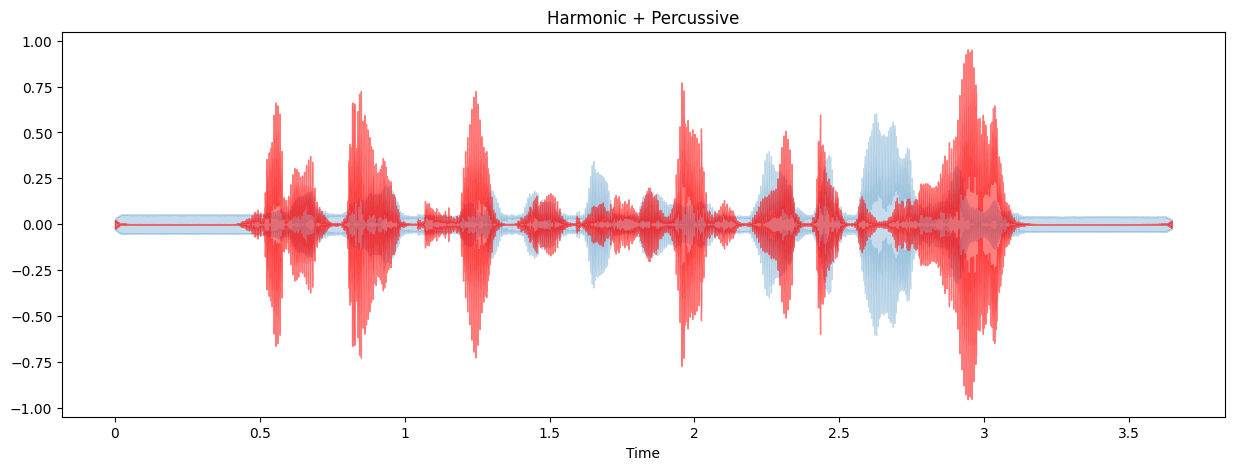

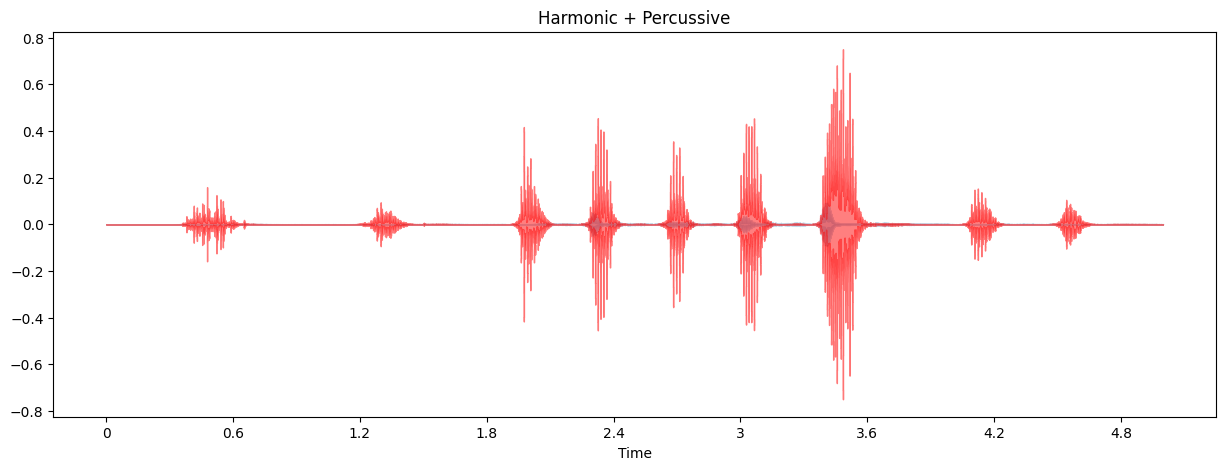

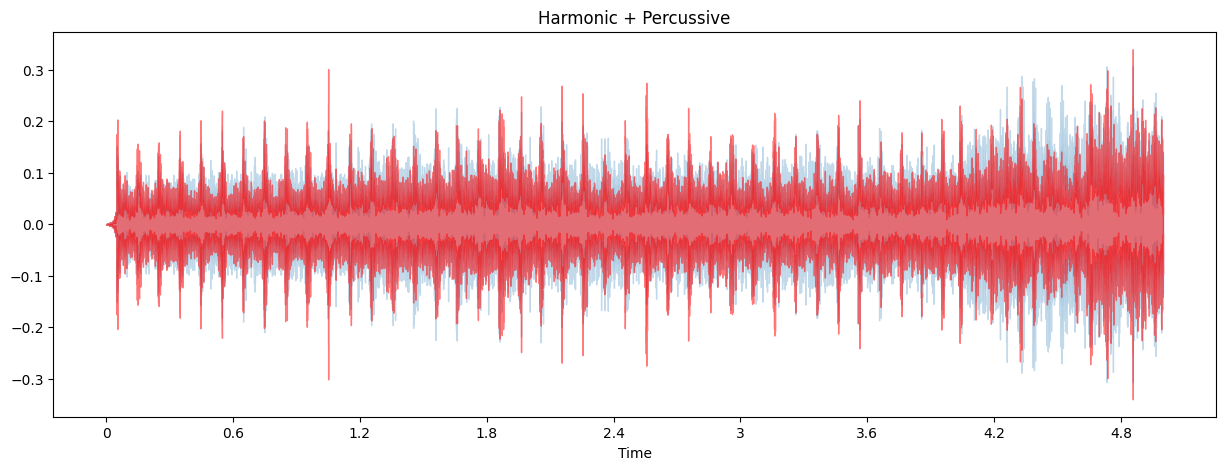

In [ ]:
def print_harmonic_percussive(y, sr):
  y_harmonic, y_percussive = librosa.effects.hpss(y)
  plt.figure(figsize=(15, 5))
  librosa.display.waveshow(y_harmonic, sr=sr, alpha=0.25)
  librosa.display.waveshow(y_percussive, sr=sr, color='r', alpha=0.5)
  plt.title('Harmonic + Percussive')

print_harmonic_percussive(y, sr)
print_harmonic_percussive(y_human, sr_human)
print_harmonic_percussive(y_animals, sr_animals)
print_harmonic_percussive(y_cars, sr_cars)

Результатом является то, что временной ряд y был разделен на два временных ряда, содержащих гармоническую и перкуссионную части сигнала. Каждый из y_harmonic и y_percussive имеет ту же форму и продолжительность, что и y.

**Нормализованная энергия цветности - Chroma Energy Normalized (CENS)**

Функции цветности основаны на двенадцати атрибутах написания основного тона, как используется в западной нотной записи, где каждый вектор цветности указывает, как энергия в кадре сигнала распределяется по двенадцати полосам цветности. Измерение таких распределений во времени дает представление времени и цветности (или хромаграмму ), которое тесно коррелирует с мелодической и гармонической прогрессией. Такие последовательности часто схожи для разных записей одного и того же. Нормализованная энергия цветности применяется для сопоставления звука, где допускаются вариации, поскольку они обычно появляются в разных исполнениях . Например, два разных исполнения одного и того же, могут демонстрировать значительные нелинейные глобальные и локальные различия в темпе, артикуляции и фразировке.

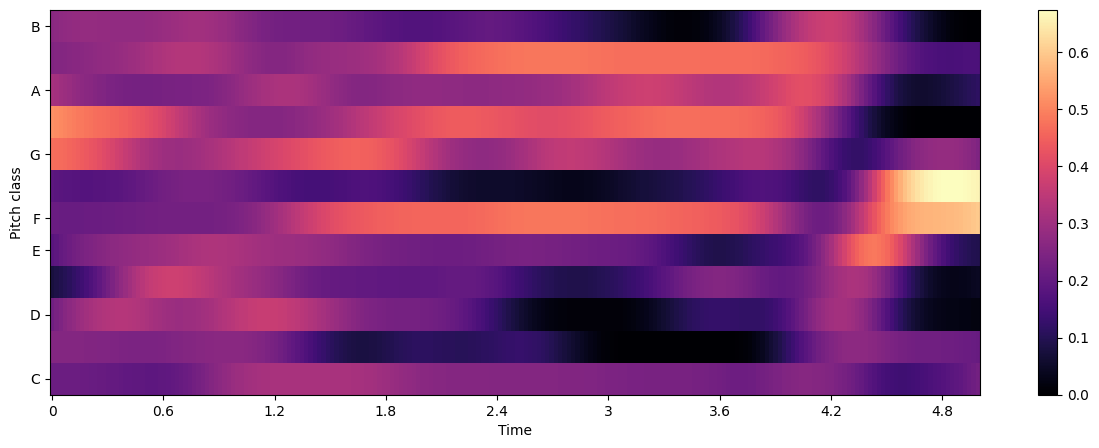

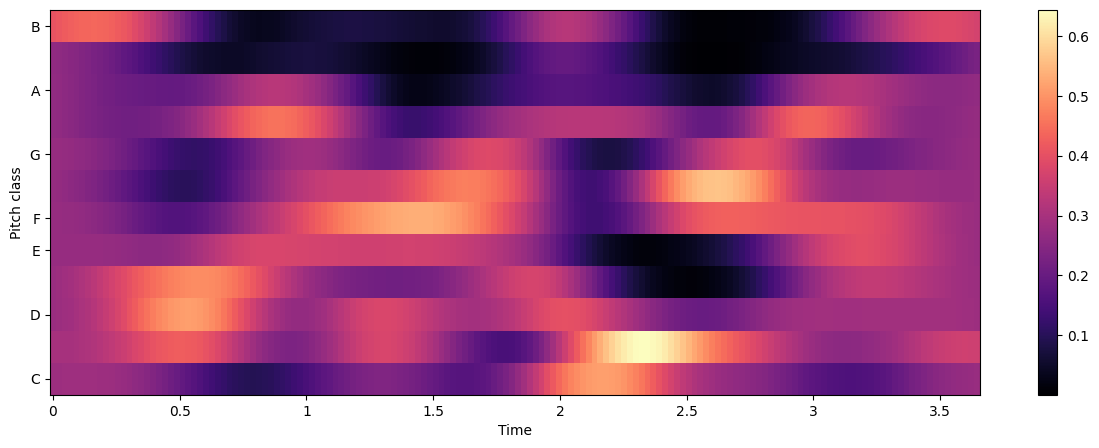

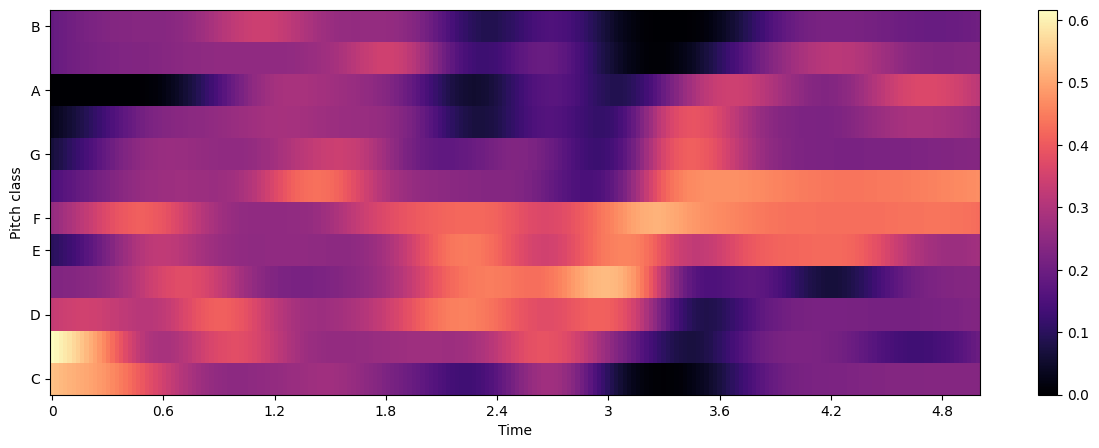

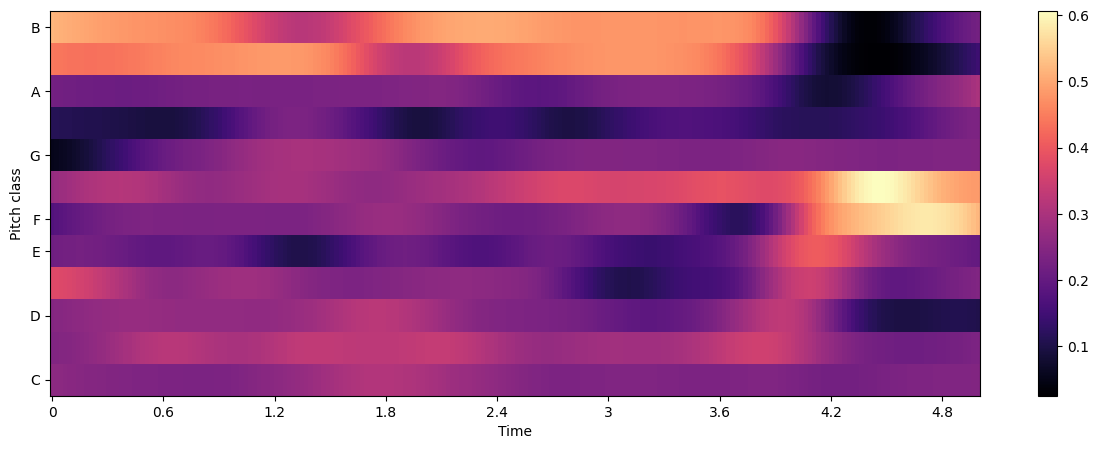

In [ ]:
def plt_cens(y, sr):
  y_harmonic = librosa.effects.hpss(y)[0]
  chroma = librosa.feature.chroma_cens(y=y_harmonic, sr=sr)
  plt.figure(figsize=(15, 5))
  librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
  plt.colorbar()

plt_cens(y, sr)
plt_cens(y_human, sr_human)
plt_cens(y_animals, sr_animals)
plt_cens(y_cars, sr_cars)

**Мел-кепстральные коэффициенты (MFCC).**

MFCC - Представляют собой набор признаков , которые описывают общую форму спектральной огибающей. Они моделируют характеристики человеческого голоса. MFCC - коэффициенты частотной капсулы, суммируют частотное распределение по размеру окна. Поэтому можно анализировать как частотные, так и временные характеристики звука. Перед построением графика коэффициенты нормализуются.

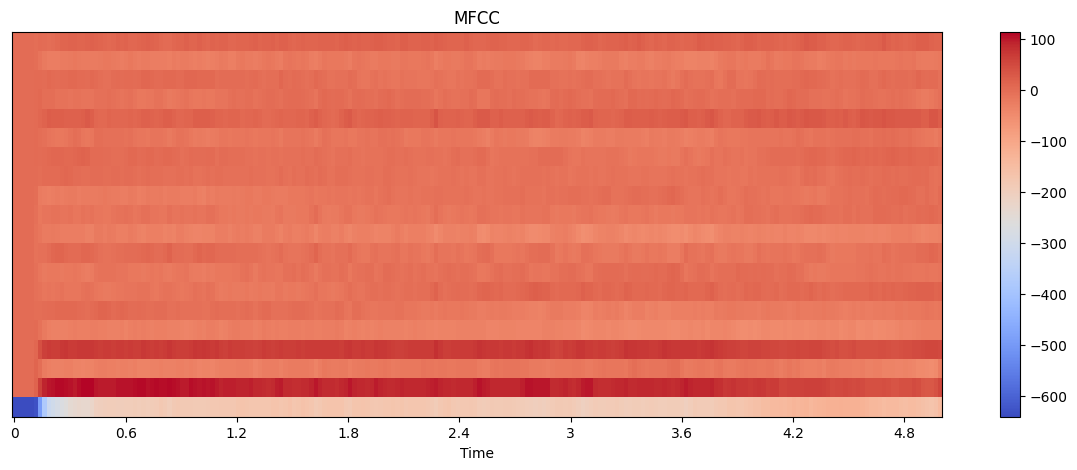

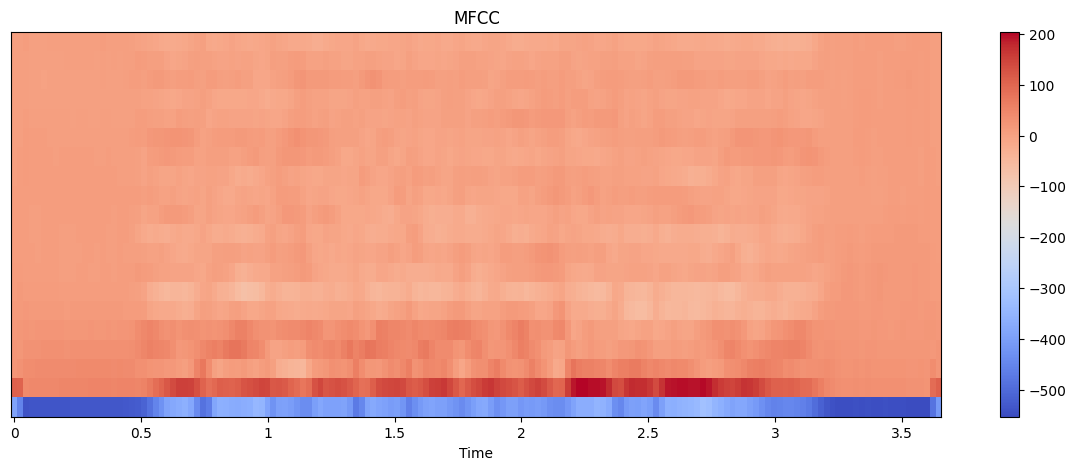

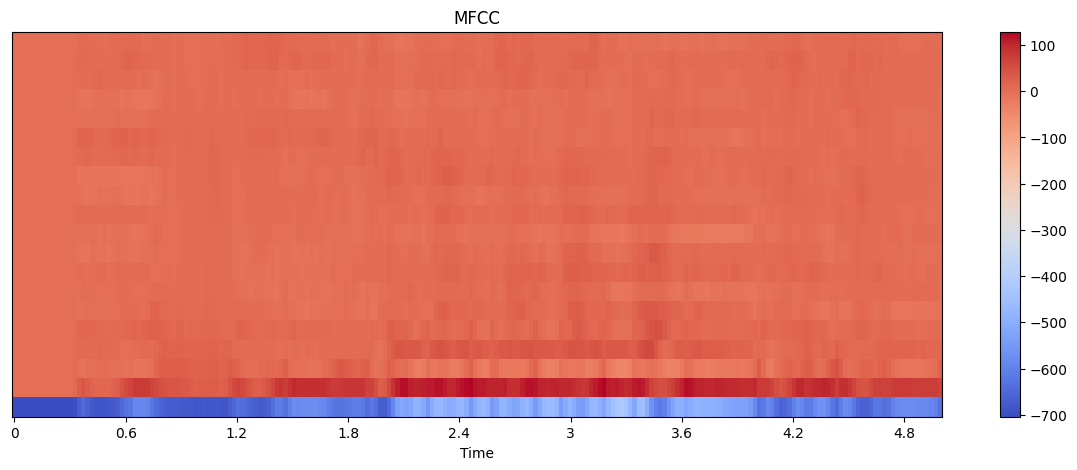

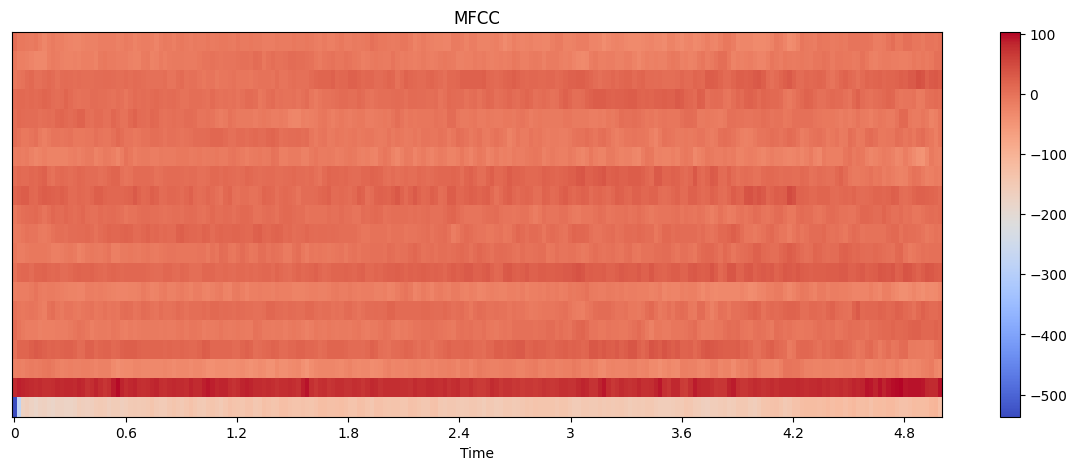

In [ ]:
def plt_mfcc(y, sr):
  y_harmonic = librosa.effects.hpss(y)[0]
  mfccs = librosa.feature.mfcc(y=y_harmonic, sr=sr, n_mfcc=20)
  plt.figure(figsize=(15, 5))
  librosa.display.specshow(mfccs, x_axis='time')
  plt.colorbar()
  plt.title('MFCC')

plt_mfcc(y, sr)
plt_mfcc(y_human, sr_human)
plt_mfcc(y_animals, sr_animals)
plt_mfcc(y_cars, sr_cars)

**Спектрограмма**

Спектрограмма - это визуальный способ представления уровня или “громкости” сигнала во времени на различных частотах, присутствующих в форме волны. Обычно изображается в виде тепловой карты. .stft() преобразует данные в кратковременное преобразование Фурье. С помощью STFT можно определить амплитуду различных частот, воспроизводимых в данный момент времени аудиосигнала.

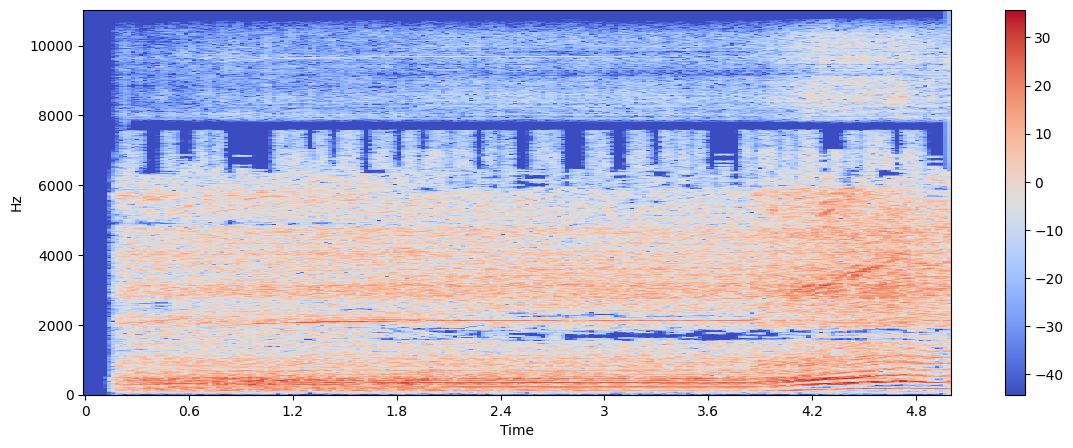

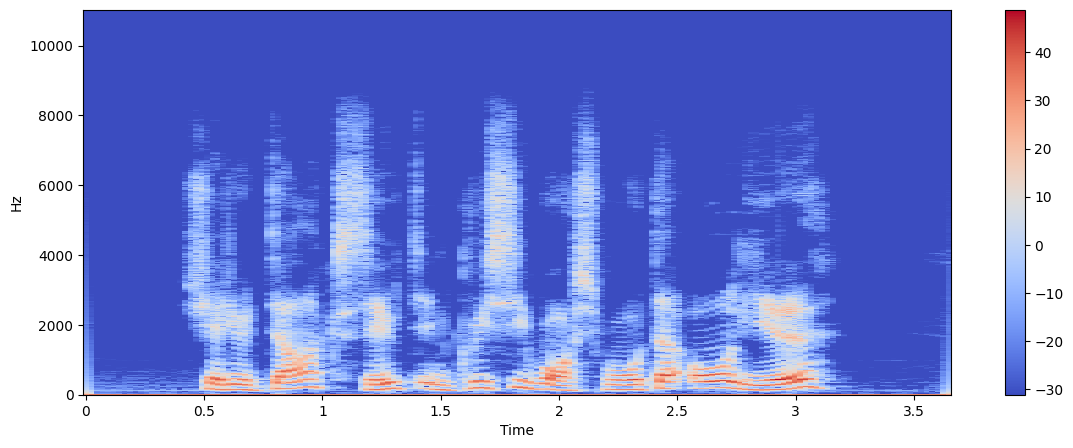

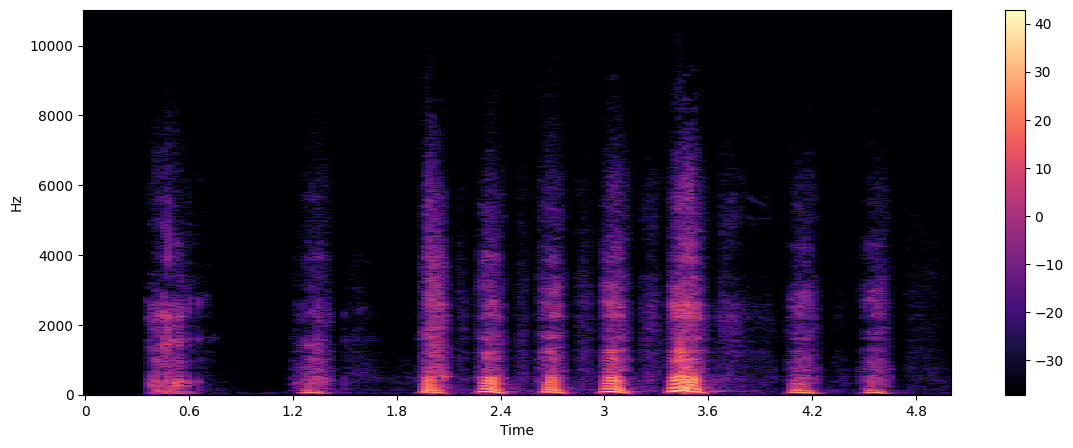

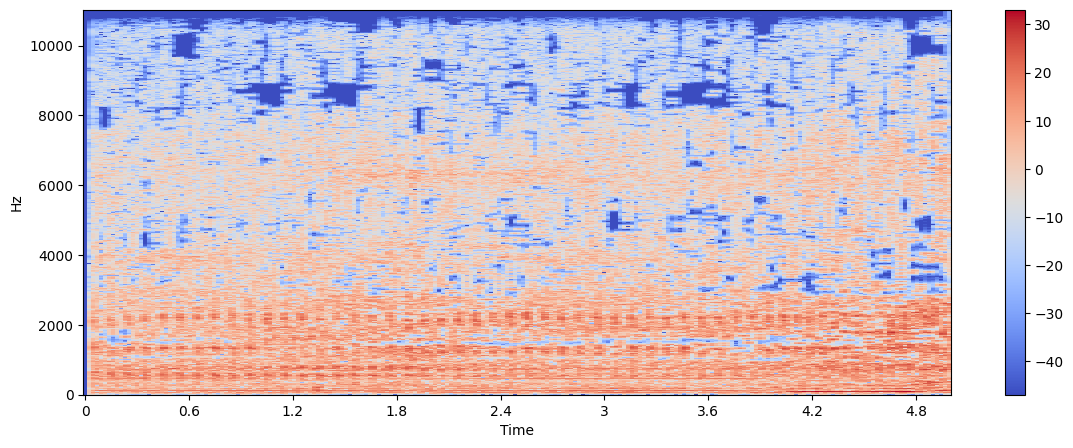

In [ ]:
def spec(y, sr):
  X = librosa.stft(y)
  Xdb = librosa.amplitude_to_db(abs(X))
  plt.figure(figsize=(14, 5))
  librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
  plt.colorbar()

spec(y, sr)
spec(y_human, sr_human)
spec(y_animals, sr_animals)
spec(y_cars, sr_cars)

Поскольку все действие происходит в нижней части спектра, мы можем преобразовать ось частот в логарифмическую:

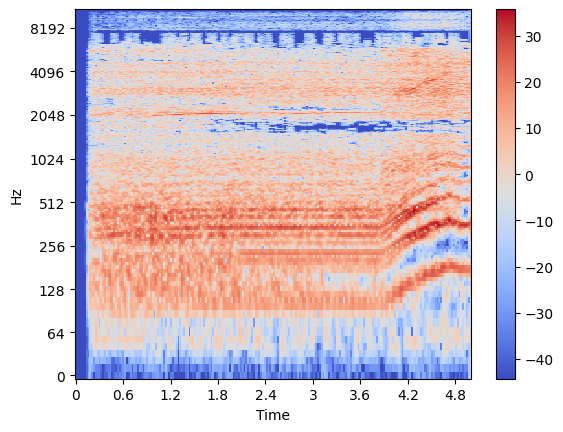

In [ ]:
def log_spec(y, sr):
  X = librosa.stft(y)
  Xdb = librosa.amplitude_to_db(abs(X))
  librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
  plt.colorbar()

log_spec(y, sr)

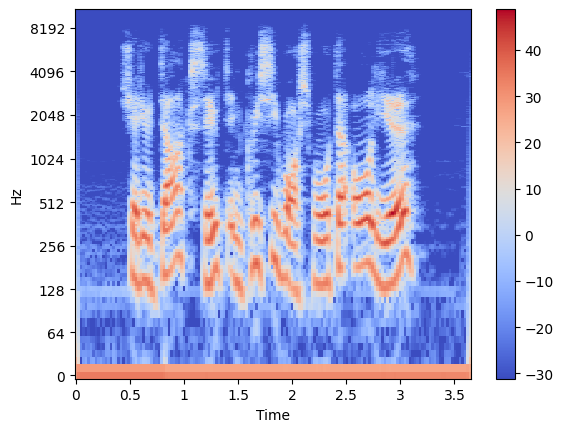

In [ ]:
log_spec(y_human, sr_human)

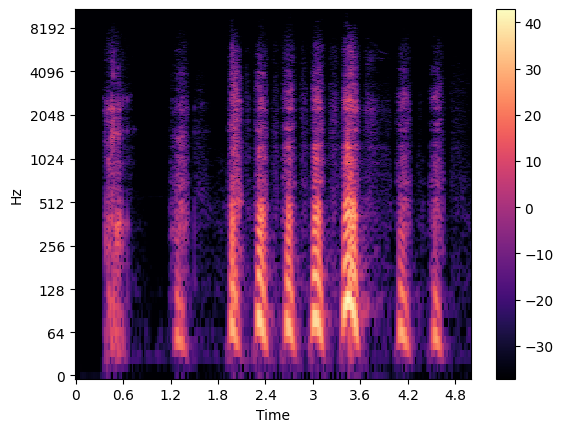

In [ ]:
log_spec(y_animals, sr_animals)

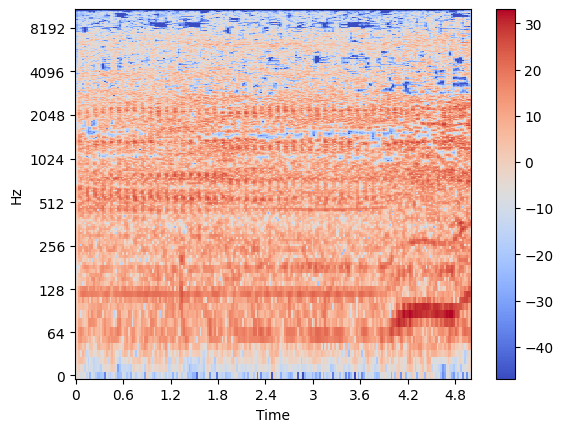

In [ ]:
log_spec(y_cars, sr_cars)

**Спектральный центроид - Spectral Centroid.**

Указывает, на какой частоте сосредоточена энергия спектра или, другими словами, указывает, где расположен “центр масс” для звука. librosa.feature.spectral_centroid вычисляет спектральный центроид для каждого фрейма в сигнале:

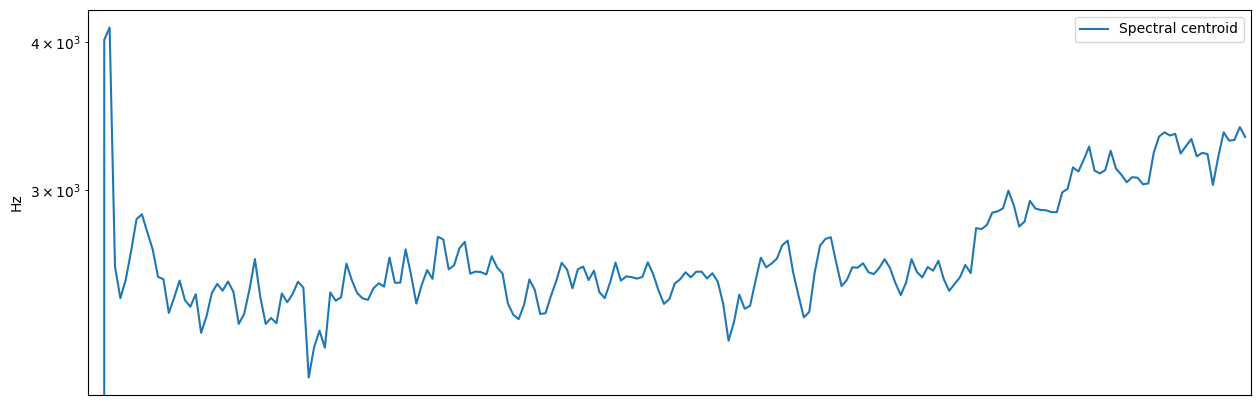

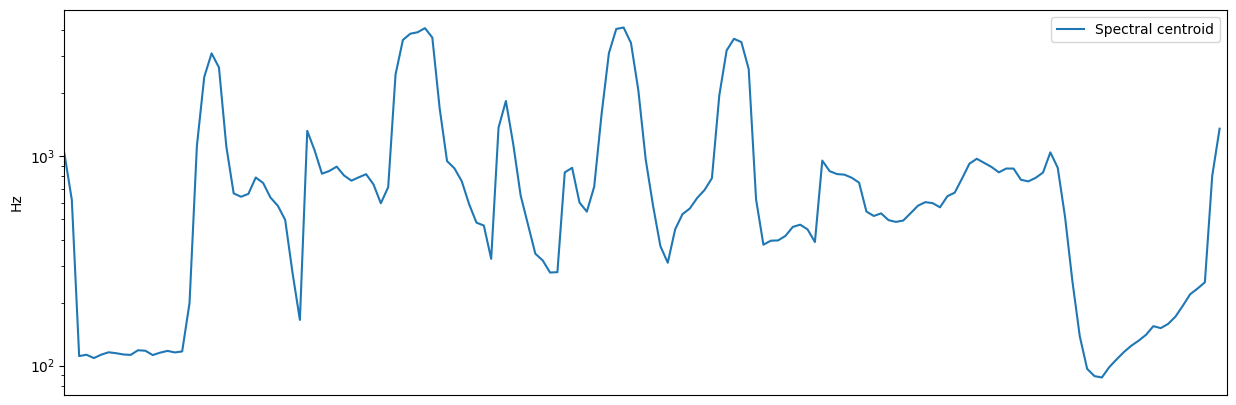

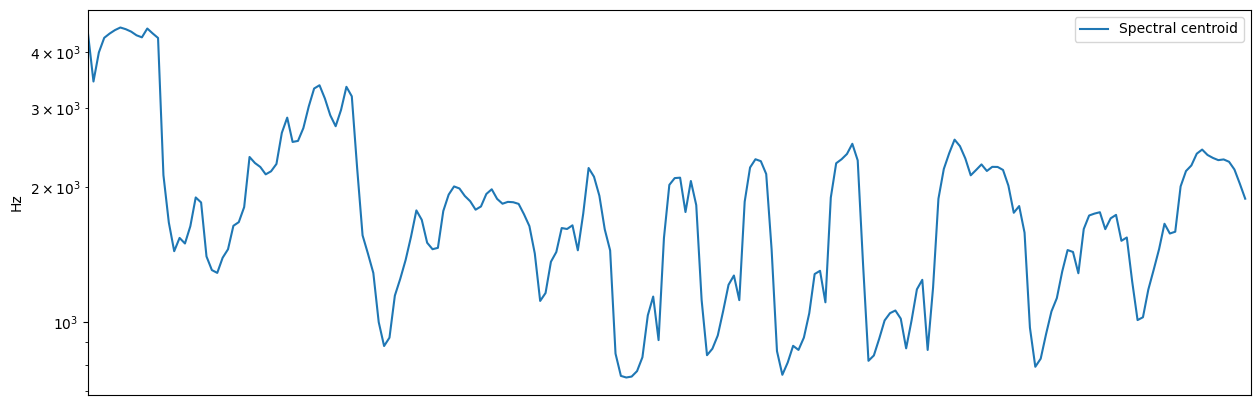

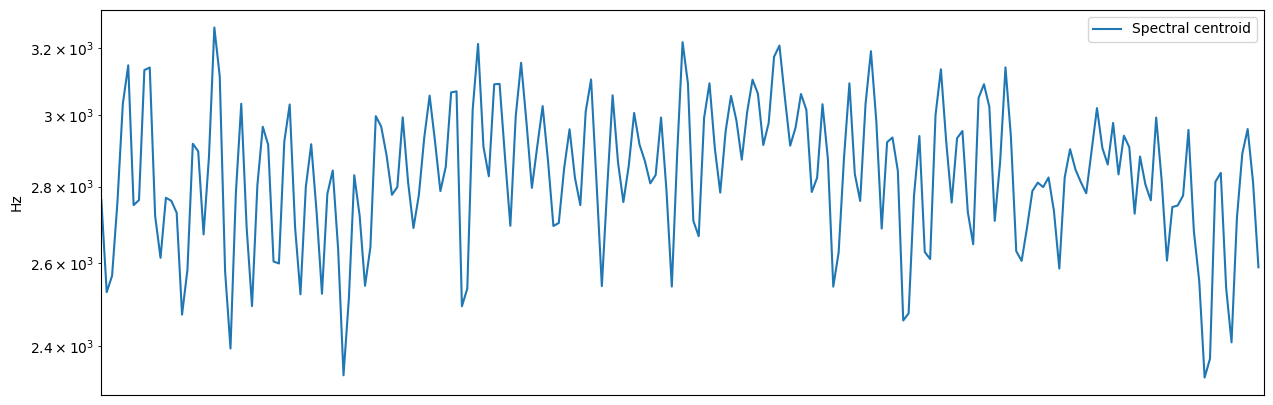

In [ ]:
def plt_spectral_centroid(y, sr):
  cent = librosa.feature.spectral_centroid(y=y, sr=sr)
  plt.figure(figsize=(15,5))
  plt.subplot(1, 1, 1)
  plt.semilogy(cent.T, label='Spectral centroid')
  plt.ylabel('Hz')
  plt.xticks([])
  plt.xlim([0, cent.shape[-1]])
  plt.legend()

plt_spectral_centroid(y, sr)
plt_spectral_centroid(y_human, sr_human)
plt_spectral_centroid(y_animals, sr_animals)
plt_spectral_centroid(y_cars, sr_cars)

**Спектральный контраст - Spectral Contrast**

Каждый кадр спектрограммы  S делится на поддиапазоны. Для каждого поддиапазона энергетический контраст оценивается путем сравнения средней энергии в верхнем квантиле (энергия пика) со средним значением энергии в нижнем квантиле (энергия впадины). Высокие значения контрастности обычно соответствуют четким узкополосным сигналам, а низкие значения контрастности соответствуют широкополосным шумам.

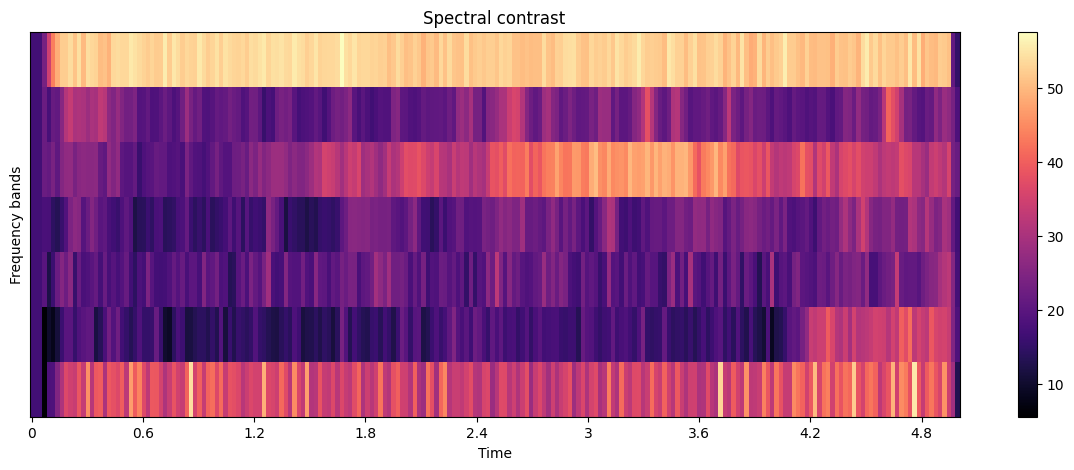

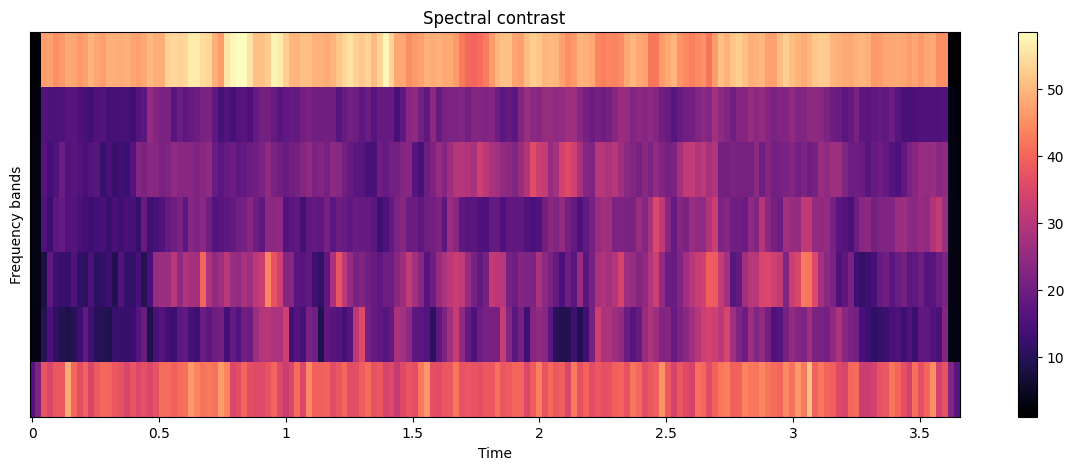

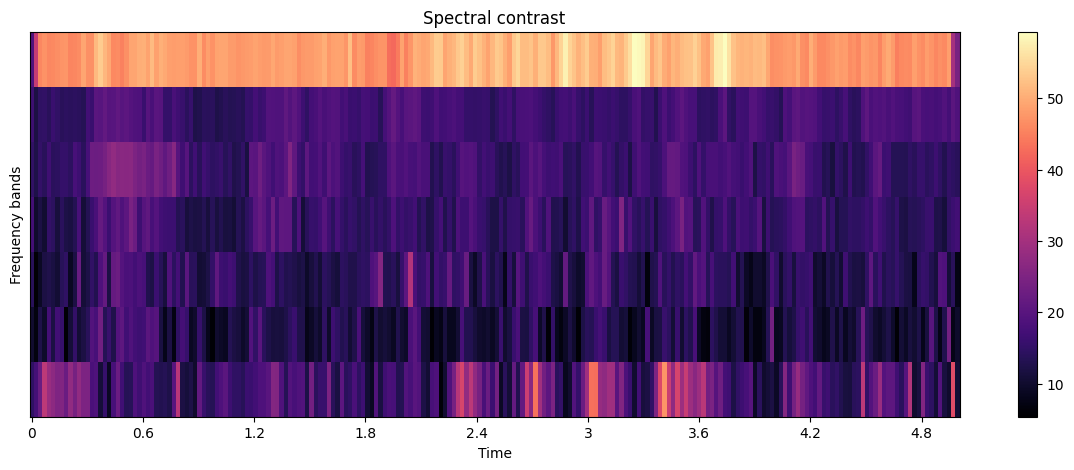

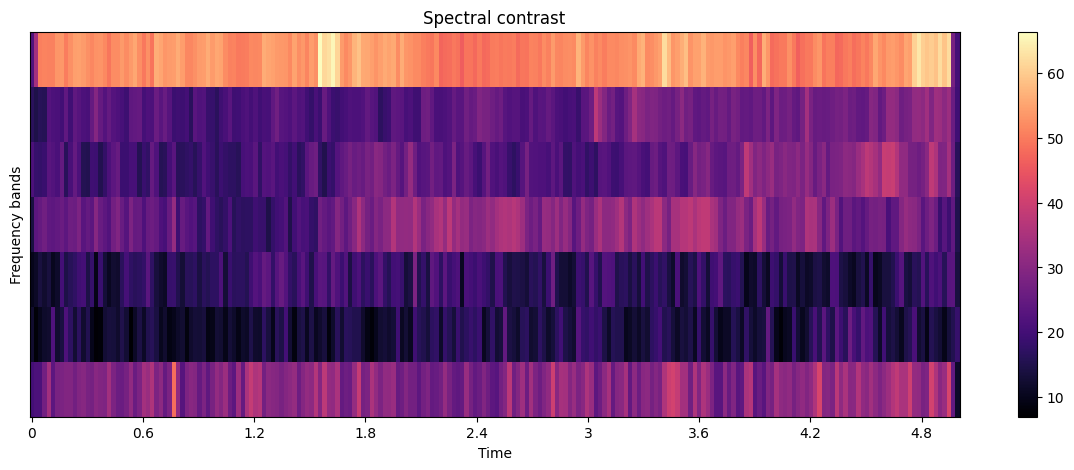

In [ ]:
def plt_spectral_contrast(y, sr):
  y_harmonic = librosa.effects.hpss(y)[0]
  contrast=librosa.feature.spectral_contrast(y=y_harmonic,sr=sr)
  plt.figure(figsize=(15,5))
  librosa.display.specshow(contrast, x_axis='time')
  plt.colorbar()
  plt.ylabel('Frequency bands')
  plt.title('Spectral contrast')

plt_spectral_contrast(y, sr)
plt_spectral_contrast(y_human, sr_human)
plt_spectral_contrast(y_animals, sr_animals)
plt_spectral_contrast(y_cars, sr_cars)

**Спектральный спад - Spectral Rolloff.**

Это мера формы сигнала, представляющая собой частоту, в которой высокие частоты снижаются до 0. Чтобы получить ее, нужно рассчитать долю элементов в спектре мощности, где 85% ее мощности находится на более низких частотах. librosa.feature.spectral_rolloff вычисляет частоту спада для каждого фрейма в сигнале:

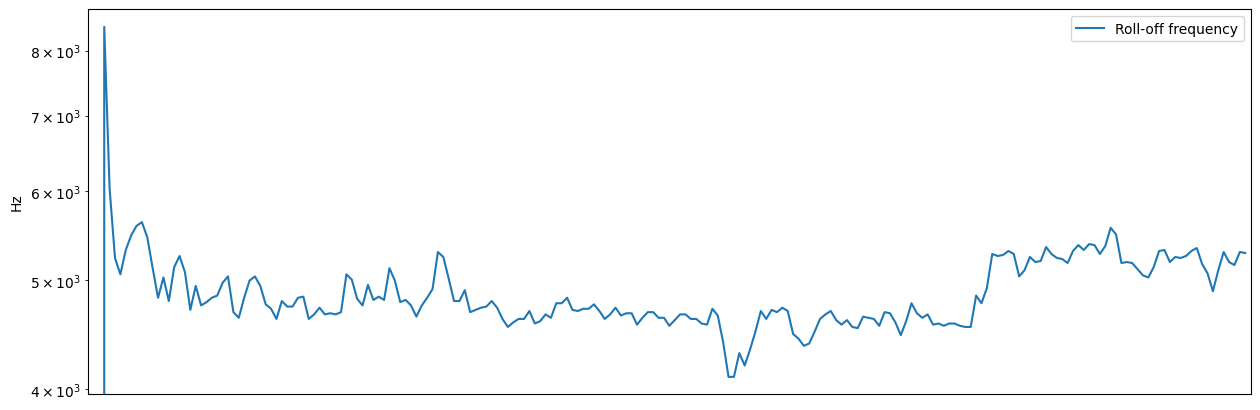

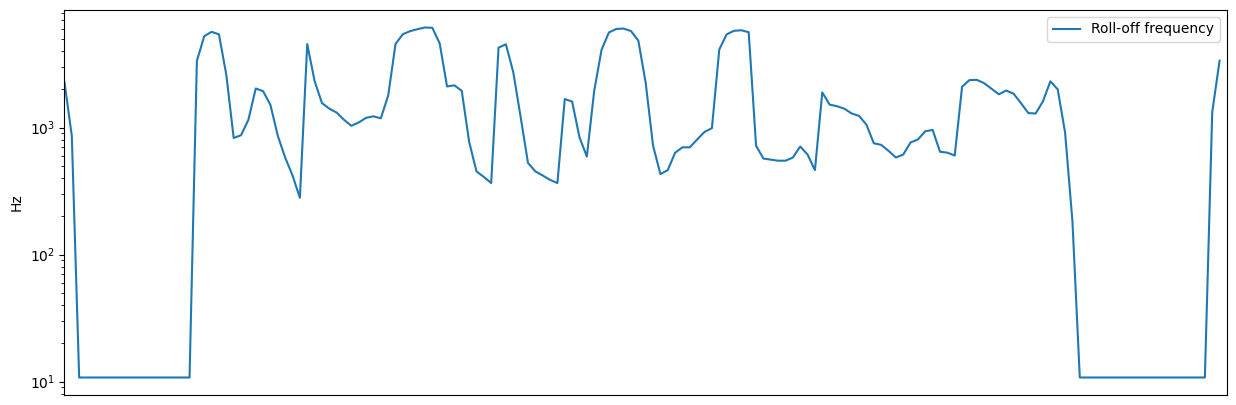

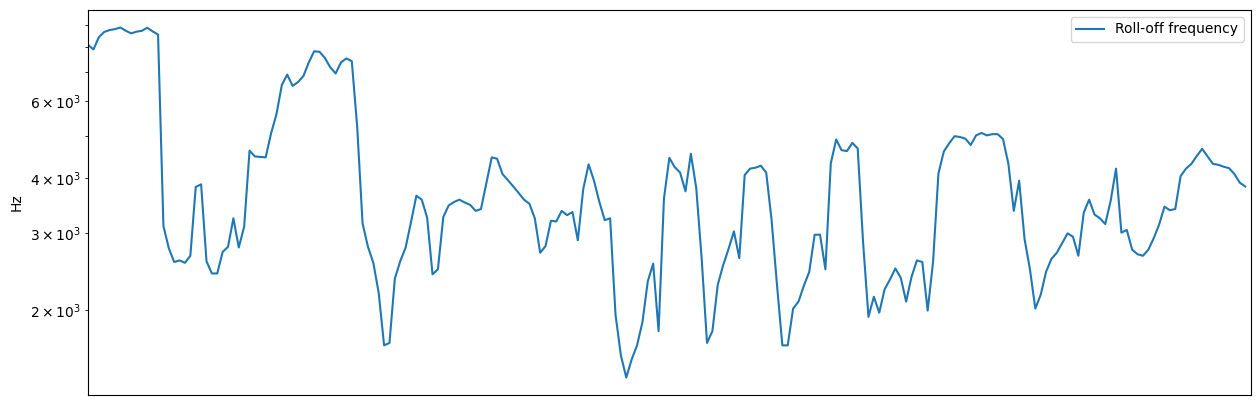

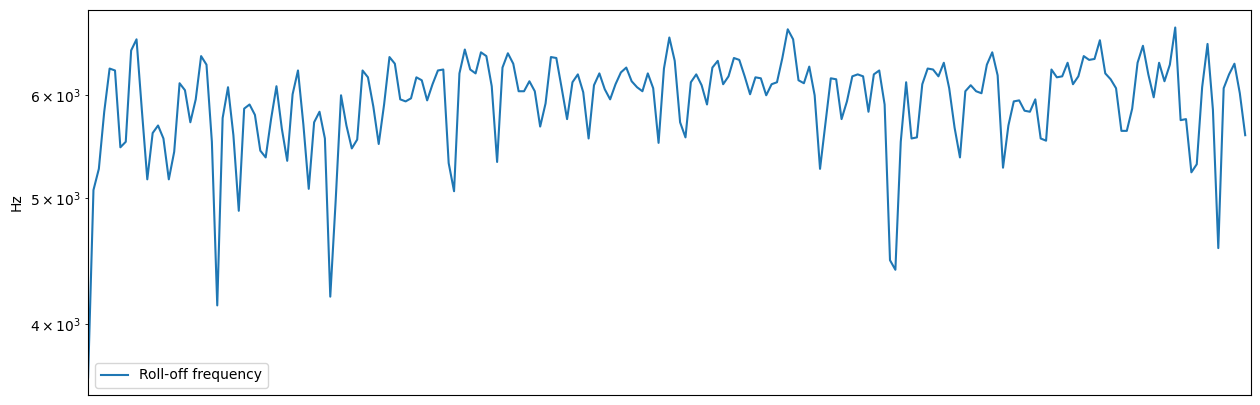

In [ ]:
def plt_spectral_rolloff(y, sr):
  rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
  plt.figure(figsize=(15,5))
  plt.semilogy(rolloff.T, label='Roll-off frequency')
  plt.ylabel('Hz')
  plt.xticks([])
  plt.xlim([0, rolloff.shape[-1]])
  plt.legend()

plt_spectral_rolloff(y, sr)
plt_spectral_rolloff(y_human, sr_human)
plt_spectral_rolloff(y_animals, sr_animals)
plt_spectral_rolloff(y_cars, sr_cars)

**Выбор характеристик для извлечения из аудиофайла.**

- Средние значения и стандартные отклонения Мел-кепстральных коэффициентов ( по 20 значений);

- Среднее значение, стандартное отклонение и skew (наклон) Спектрального центроида

- Среднее значение и стандартное отклонение Спектрального спада;

**Мел-кепстральные коэффициенты (MFCC).**

In [ ]:
y_harmonic = librosa.effects.hpss(y)[0]
mfccs = librosa.feature.mfcc(y=y_harmonic, sr=sr, n_mfcc=20)
mfccs

array([[-639.8808   , -639.8808   , -639.8808   , ..., -168.87875  ,
        -160.90453  , -142.95927  ],
       [   0.       ,    0.       ,    0.       , ...,   29.491299 ,
          38.900898 ,   53.776047 ],
       [   0.       ,    0.       ,    0.       , ...,  -51.99205  ,
         -45.522076 ,  -25.521816 ],
       ...,
       [   0.       ,    0.       ,    0.       , ...,    3.8734086,
           4.20415  ,   -7.1030116],
       [   0.       ,    0.       ,    0.       , ...,  -22.198622 ,
         -19.772923 ,  -17.02467  ],
       [   0.       ,    0.       ,    0.       , ...,   15.413819 ,
          13.356353 ,   12.9129715]], dtype=float32)

**Средние значения и стандартные отклонения Мел-кепстральных коэффициентов**

Давайте посмотрим, как выглядят Средние значения и стандартные отклонения Мел-кепстральных коэффициентов в виде двухмерной таблицы (Dataframes), состоящей из столбцов и строки и в виде графика.

mfccs_mean_0  mfccs_mean_1  mfccs_mean_2  mfccs_mean_3  mfccs_mean_4  \
0   -192.786316     81.358788    -22.610144     62.074711    -34.983749   

   mfccs_mean_5  mfccs_mean_6  mfccs_mean_7  mfccs_mean_8  mfccs_mean_9  ...  \
0    -14.720109     -1.221204     -8.595468     -7.535733    -33.835239  ...   

   mfccs_std_10  mfccs_std_11  mfccs_std_12  mfccs_std_13  mfccs_std_14  \
0      6.596147       8.60836      4.584876      7.780959      8.050396   

   mfccs_std_15  mfccs_std_16  mfccs_std_17  mfccs_std_18  mfccs_std_19  
0      7.603656      6.419957      6.305231      6.757326       5.02882  

[1 rows x 40 columns]

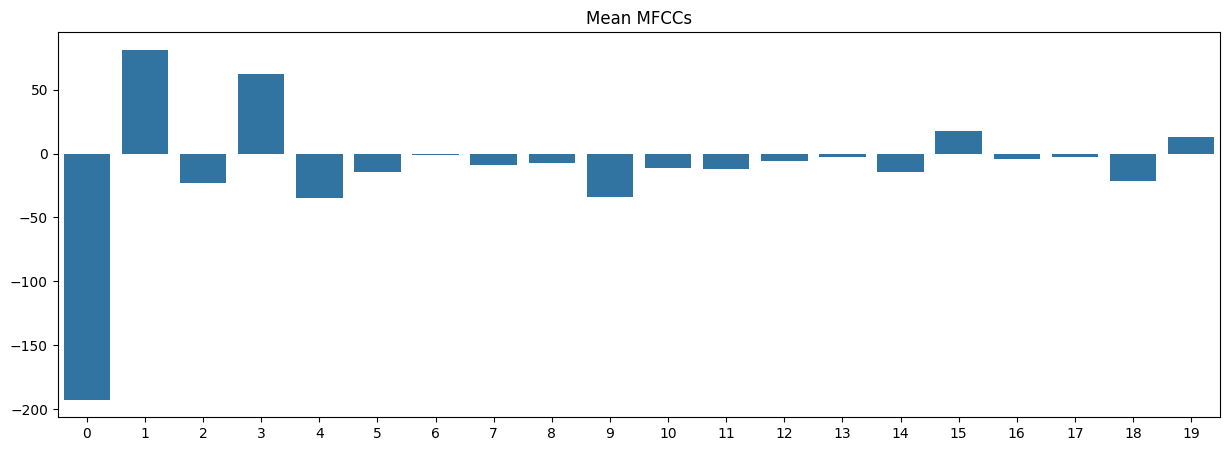

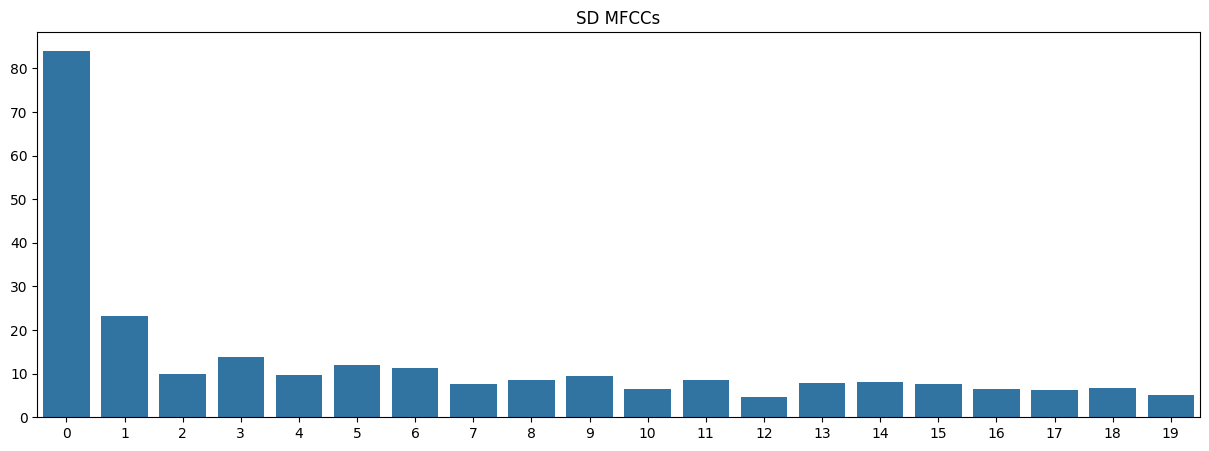

In [ ]:
mfccs_mean=np.mean(mfccs,axis=1)
mfccs_std=np.std(mfccs,axis=1)

coeffs=np.arange(0,20)
plt.figure(figsize=(15,5))
plt.title('Mean MFCCs')
sns.barplot(x=coeffs,y=mfccs_mean)

plt.figure(figsize=(15,5))
plt.title('SD MFCCs')
sns.barplot(x=coeffs,y=mfccs_std)
# Generate the chroma Dataframe
mfccs_df=pd.DataFrame()
for i in range(0,20):
    mfccs_df['mfccs_mean_'+str(i)]=mfccs_mean[i]
for i in range(0,20):
    mfccs_df['mfccs_std_'+str(i)]=mfccs_mean[i]
mfccs_df.loc[0]=np.concatenate((mfccs_mean,mfccs_std),axis=0)
mfccs_df

**Среднее значение, стандартное отклонение и skew (наклон) Спектрального центроида;**

In [20]:
import scipy

In [ ]:
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
cent_mean=np.mean(cent)
cent_std=np.std(cent)
cent_skew=scipy.stats.skew(cent,axis=1)[0]
print('Mean: '+str(cent_mean))
print('SD: '+str(cent_std))
print('Skewness: '+str(cent_skew))

Mean: 2628.6658495243414
SD: 440.0210140663706
Skewness: -2.296968215732836


**Среднее значение и стандартное отклонение Спектрального спада;**

In [ ]:
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
rolloff_mean=np.mean(rolloff)
rolloff_std=np.std(rolloff)
rolloff_skew=scipy.stats.skew(rolloff,axis=1)[0]
print('Mean: '+str(rolloff_mean))
print('SD: '+str(rolloff_std))
print('Skewness: '+str(rolloff_skew))

Mean: 4803.898111979167
SD: 690.9115383776045
Skewness: -3.91907227184131


**Извлечение значимых характеристик**

Из всех аудиофайлов в наборе данных с помощью библиотеки librosa - librosa.feature, метода append( ) и метода extend( ) проводим:

- Извлечение из Мел-кепстральных коэффициентов - средние значения и стандартные отклонения (по 20 значений);

- Извлечение из Спектрального центроида - среднее значение, стандартное отклонение и skew (наклон);

- Извлечение из Спектрального спада - среднее значение и стандартное отклонение;

Извлечение значимых характеристик:

In [24]:
balanced_data

path  label
3776  /content/drive/MyDrive/CREMA-D/AudioWAV/1052_M...  human
2126  /content/drive/MyDrive/TESS/TESS Toronto emoti...  human
3576  /content/drive/MyDrive/CREMA-D/AudioWAV/1050_I...  human
2639  /content/drive/MyDrive/CREMA-D/AudioWAV/1063_I...  human
5536  /content/drive/MyDrive/CREMA-D/AudioWAV/1025_I...  human
...                                                 ...    ...
1763    /content/drive/MyDrive/drones/1_segment_438.wav  drone
1764    /content/drive/MyDrive/drones/1_segment_439.wav  drone
1765    /content/drive/MyDrive/drones/1_segment_440.wav  drone
1766    /content/drive/MyDrive/drones/1_segment_441.wav  drone
1767    /content/drive/MyDrive/drones/1_segment_442.wav  drone

[12486 rows x 2 columns]

In [25]:
def extract_features(mfccs_df, file_name):
  y, sr = librosa.load(file_name)
  y_harmonic = librosa.effects.hpss(y)[0]
  mfccs = librosa.feature.mfcc(y=y_harmonic, sr=sr, n_mfcc=20)

  mfccs_mean=np.mean(mfccs,axis=1)
  mfccs_std=np.std(mfccs,axis=1)

  cent = librosa.feature.spectral_centroid(y=y, sr=sr)
  cent_mean=np.mean(cent)
  cent_std=np.std(cent)
  cent_skew=scipy.stats.skew(cent,axis=1)[0]

  rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
  rolloff_mean=np.mean(rolloff)
  rolloff_std=np.std(rolloff)
  rolloff_skew=scipy.stats.skew(rolloff,axis=1)[0]

  # Generate the chroma Dataframe
  mfccs_df.loc[mfccs_df['path'] == file_name, 'cent_mean'] = cent_mean
  mfccs_df.loc[mfccs_df['path'] == file_name, 'cent_std'] = cent_std
  mfccs_df.loc[mfccs_df['path'] == file_name, 'cent_skew'] = cent_skew
  mfccs_df.loc[mfccs_df['path'] == file_name, 'rolloff_mean'] = rolloff_mean
  mfccs_df.loc[mfccs_df['path'] == file_name, 'rolloff_std'] = rolloff_std
  mfccs_df.loc[mfccs_df['path'] == file_name, 'rolloff_skew'] = rolloff_skew
  for i in range(0,20):
    mfccs_df.loc[mfccs_df['path'] == file_name, 'mfccs_mean_'+str(i)]=mfccs_mean[i]
  for i in range(0,20):
    mfccs_df.loc[mfccs_df['path'] == file_name, 'mfccs_std_'+str(i)]=mfccs_std[i]


  return mfccs_df


In [23]:
new_data = balanced_data.copy()
for i in data['path']:
  new_data = extract_features(new_data, i)
new_data.to_csv('/content/drive/MyDrive/sound.csv', index=False)
new_data.head(10)

KeyboardInterrupt: 

In [26]:
import os

new_data = balanced_data.copy()
bad_files = []

for i in data['path']:
    try:
        new_data = extract_features(new_data, i)
    except Exception as e:
        print(f"Error processing file {i}: {e}")
        bad_files.append(i)

# Удалите плохие файлы из датафрейма
new_data = new_data[~new_data['path'].isin(bad_files)]

new_data.to_csv('/content/drive/MyDrive/sound.csv', index=False)
new_data.head(10)

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=992
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=375
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=838
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1521
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=794
  warnings.warn(


Error processing file /content/drive/MyDrive/cars/VehicleNoise214_segment_2.wav: Audio buffer is not finite everywhere


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1874
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=176
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=772
  warnings.warn(


Error processing file /content/drive/MyDrive/cars/VehicleNoise331_segment_2.wav: Audio buffer is not finite everywhere


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=419
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1345
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1036
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1918
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1499
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1696
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:

Error processing file /content/drive/MyDrive/cats_sound/.ipynb_checkpoints: [Errno 21] Is a directory: '/content/drive/MyDrive/cats_sound/.ipynb_checkpoints'
Error processing file /content/drive/MyDrive/dog_sound/.ipynb_checkpoints: [Errno 21] Is a directory: '/content/drive/MyDrive/dog_sound/.ipynb_checkpoints'


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1676
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=89
  warnings.warn(


path  label    cent_mean  \
3776  /content/drive/MyDrive/CREMA-D/AudioWAV/1052_M...  human  1282.538476   
2126  /content/drive/MyDrive/TESS/TESS Toronto emoti...  human  2795.860250   
3576  /content/drive/MyDrive/CREMA-D/AudioWAV/1050_I...  human  1013.943253   
2639  /content/drive/MyDrive/CREMA-D/AudioWAV/1063_I...  human  1607.926531   
5536  /content/drive/MyDrive/CREMA-D/AudioWAV/1025_I...  human  1212.847255   
6965  /content/drive/MyDrive/CREMA-D/AudioWAV/1018_I...  human  1109.860781   
6534  /content/drive/MyDrive/CREMA-D/AudioWAV/1013_I...  human  1655.546356   
4953  /content/drive/MyDrive/CREMA-D/AudioWAV/1042_M...  human  1058.640980   
5491  /content/drive/MyDrive/CREMA-D/AudioWAV/1024_T...  human  1238.813637   
420   /content/drive/MyDrive/TESS/TESS Toronto emoti...  human  2012.691059   

         cent_std  cent_skew  rolloff_mean  rolloff_std  rolloff_skew  \
3776   450.545824   3.056750   2754.725525  1230.546851      0.623641   
2126  1787.128379   2.026224   5135.539227  2048.215987      1.286107   
3576   305.165146   2.044350   2067.320421  1116.349230      0.514249   
2639   306.712129   0.268626   3399.627191   460.449153      0.437514   
5536   467.082985   2.745149   2655.761719  1166.958449      1.031676   
6965   184.017468   0.425677   2450.671089   669.368522     -0.630366   
6534   663.753915   1.191679   3418.353608  1184.344571      0.457385   
4953   351.701499   3.041256   2184.021950  1091.346480      0.607555   
5491   450.273881   3.101594   2819.610974  1165.844752      2.146605   
420   1605.624075   1.887083   3130.175781  2624.592060      1.061610   

      mfccs_mean_0  mfccs_mean_1  ...  mfccs_std_10  mfccs_std_11  \
3776   -443.307739    117.078255  ...      6.099713      5.133165   
2126   -401.284790     44.491005  ...      6.659695      9.249584   
3576   -493.654999    151.942657  ...      3.710649      3.005217   
2639   -442.496002    137.281586  ...      5.908139      6.186736   
5536   -489.938019    128.690567  ...      5.171457      4.389512   
6965   -485.659851    121.724083  ...      4.009742      3.190064   
6534   -395.607391    112.862694  ...      7.433673      5.713836   
4953   -461.384460    133.360886  ...      3.918394      7.752956   
5491   -517.395996    139.319870  ...      4.315924      4.232720   
420    -550.275269     80.604561  ...      7.416255     12.786212   

      mfccs_std_12  mfccs_std_13  mfccs_std_14  mfccs_std_15  mfccs_std_16  \
3776      5.272880      8.986975      8.366316      8.253262      9.944162   
2126     13.878966      7.851045      9.272812     11.829461     19.066196   
3576      3.834192      3.344083      3.735448      4.225019      4.188567   
2639      8.121641      9.242071     14.068876      4.926144      9.397861   
5536      5.653111      4.450002      5.257935      3.873833      4.037808   
6965      4.409221      5.057810      6.337394      6.304414      4.660164   
6534      5.765605     10.189179      6.568854      5.477166      5.773204   
4953      9.101348      7.514740      4.632715      7.378045      4.884377   
5491      3.866935      3.258013      3.366980      5.004680      3.162028   
420       7.469441      7.633225      9.310988      6.583563     11.880500   

      mfccs_std_17  mfccs_std_18  mfccs_std_19  
3776     13.019482     11.300673      6.135646  
2126     21.986519     16.874693      9.223750  
3576      4.515171      3.510899      3.745374  
2639     10.464822      8.151205      5.799177  
5536      4.365799      5.281617      5.758304  
6965      3.406215      3.979421      7.497985  
6534      6.214299      7.895351     14.118973  
4953      5.861557      5.663668      7.335435  
5491      3.952268      3.494330      4.742650  
420      13.010120     15.337010     12.376793  

[10 rows x 48 columns]

In [27]:
new_data['label'].value_counts()

label
car       4627
human     4000
animal    2087
drone     1768
Name: count, dtype: int64

In [28]:
print(tf.__version__)

2.15.0


In [95]:
data = pd.read_csv('/content/sound.csv')

In [96]:
data

path  label    cent_mean  \
0                            SAVEE/SAVEE/ALL/KL_su06.wav  human   598.921911   
1                            SAVEE/SAVEE/ALL/KL_su08.wav  human  1154.576593   
2                            SAVEE/SAVEE/ALL/KL_su09.wav  human  1030.575481   
3                            SAVEE/SAVEE/ALL/KL_su10.wav  human   927.490180   
4                            SAVEE/SAVEE/ALL/KL_su13.wav  human   757.621458   
...                                                  ...    ...          ...   
28061                    drones/drones/1_segment_280.wav  drone  3623.550999   
28062  drones/drones/Flying Drone Sound For ｜ Sleep, ...  drone  3396.567571   
28063  drones/drones/Flying Drone Sound For ｜ Sleep, ...  drone  3456.843669   
28064                     drones/drones/1_segment_90.wav  drone  3477.780060   
28065                     drones/drones/1_segment_15.wav  drone  3580.803600   

          cent_std  cent_skew  rolloff_mean  rolloff_std  rolloff_skew  \
0       516.393860   3.449514    836.000977  1160.239012      2.547287   
1      1006.038920   2.003174   1936.633543  1800.422415      1.249633   
2       755.082059   2.501246   1890.136719  1484.602550      1.600538   
3       651.788172   3.476530   1647.041579  1199.122125      2.181421   
4       459.088821   3.121712   1293.329216  1150.643669      2.476032   
...            ...        ...           ...          ...           ...   
28061   197.320201   0.023185   7244.577026   805.290146      0.091378   
28062   171.016227   0.229366   5653.412882   292.580117     -0.014924   
28063   132.158903   0.011913   6038.966878   330.909448      2.320725   
28064   187.766823  -0.339241   7129.284668   672.363676     -0.338578   
28065   166.524824  -0.030892   6652.762858   613.812649      0.555089   

       mfccs_mean_0  mfccs_mean_1  ...  mfccs_std_10  mfccs_std_11  \
0        -656.87710     82.781860  ...     12.987773     12.788998   
1        -688.78937     92.861440  ...     11.171387      9.365631   
2        -692.45690    117.701360  ...      9.436006     13.512285   
3        -625.56900    122.979790  ...      9.884428     10.096248   
4        -668.70420     90.708260  ...     10.194020      6.144279   
...             ...           ...  ...           ...           ...   
28061    -193.15443     19.038252  ...      9.329705      7.250895   
28062    -191.91515     41.668650  ...      6.674587      5.149279   
28063    -173.79199     38.791252  ...      4.289953      4.553828   
28064    -164.48387     26.685942  ...      7.241557      5.996767   
28065    -191.87976     17.096657  ...      7.538382      8.398336   

       mfccs_std_12  mfccs_std_13  mfccs_std_14  mfccs_std_15  mfccs_std_16  \
0          9.398462      6.815949      6.495024      4.644834      7.085617   
1          8.643489      7.521792      8.640204      8.164831      8.861729   
2          7.797785      9.407264     11.406900      5.950482      6.547378   
3          8.563185      6.333566      8.204486      8.730958      8.633234   
4          5.157644      5.781042      8.756358      7.738922      5.458243   
...             ...           ...           ...           ...           ...   
28061      6.814286      8.045115      5.196682      9.327794      6.920519   
28062     11.354517      6.418497      7.292920     10.675614      7.450380   
28063      4.541014      6.640682      6.346967      5.308393      6.014765   
28064      6.390035      6.420273      5.640294      5.773729      7.006730   
28065     13.127011      7.013738      8.857467     14.339593      9.879982   

       mfccs_std_17  mfccs_std_18  mfccs_std_19  
0          7.665273      7.333405      6.475397  
1          6.383244      5.891202      6.422488  
2          5.414150      6.187654      8.230552  
3          6.545668      5.003474      5.988625  
4          4.498250      5.006563      5.769183  
...             ...           ...           ...  
28061      9.782968      8.298004      7.270009  
28062      6

In [97]:
data['label'].value_counts()

label
drone     7020
human     7018
animal    7016
car       7012
Name: count, dtype: int64

In [101]:
data.isnull().sum()

path               0
label              0
cent_mean          0
cent_std           0
cent_skew        107
rolloff_mean       0
rolloff_std        0
rolloff_skew     115
mfccs_mean_0       0
mfccs_mean_1       0
mfccs_mean_2       0
mfccs_mean_3       0
mfccs_mean_4       0
mfccs_mean_5       0
mfccs_mean_6       0
mfccs_mean_7       0
mfccs_mean_8       0
mfccs_mean_9       0
mfccs_mean_10      0
mfccs_mean_11      0
mfccs_mean_12      0
mfccs_mean_13      0
mfccs_mean_14      0
mfccs_mean_15      0
mfccs_mean_16      0
mfccs_mean_17      0
mfccs_mean_18      0
mfccs_mean_19      0
mfccs_std_0        0
mfccs_std_1        0
mfccs_std_2        0
mfccs_std_3        0
mfccs_std_4        0
mfccs_std_5        0
mfccs_std_6        0
mfccs_std_7        0
mfccs_std_8        0
mfccs_std_9        0
mfccs_std_10       0
mfccs_std_11       0
mfccs_std_12       0
mfccs_std_13       0
mfccs_std_14       0
mfccs_std_15       0
mfccs_std_16       0
mfccs_std_17       0
mfccs_std_18       0
mfccs_std_19 

In [102]:
data = data.dropna()

In [103]:
data.isnull().sum()

path             0
label            0
cent_mean        0
cent_std         0
cent_skew        0
rolloff_mean     0
rolloff_std      0
rolloff_skew     0
mfccs_mean_0     0
mfccs_mean_1     0
mfccs_mean_2     0
mfccs_mean_3     0
mfccs_mean_4     0
mfccs_mean_5     0
mfccs_mean_6     0
mfccs_mean_7     0
mfccs_mean_8     0
mfccs_mean_9     0
mfccs_mean_10    0
mfccs_mean_11    0
mfccs_mean_12    0
mfccs_mean_13    0
mfccs_mean_14    0
mfccs_mean_15    0
mfccs_mean_16    0
mfccs_mean_17    0
mfccs_mean_18    0
mfccs_mean_19    0
mfccs_std_0      0
mfccs_std_1      0
mfccs_std_2      0
mfccs_std_3      0
mfccs_std_4      0
mfccs_std_5      0
mfccs_std_6      0
mfccs_std_7      0
mfccs_std_8      0
mfccs_std_9      0
mfccs_std_10     0
mfccs_std_11     0
mfccs_std_12     0
mfccs_std_13     0
mfccs_std_14     0
mfccs_std_15     0
mfccs_std_16     0
mfccs_std_17     0
mfccs_std_18     0
mfccs_std_19     0
dtype: int64

In [104]:
data['label'].value_counts()

label
human     7017
drone     7002
car       7001
animal    6931
Name: count, dtype: int64

Мы получили набор данных, содержащий значимые характеристики аудиоданных (46 значений) в машиночитаемом виде - Двухмерная таблица - Dataframes, состоящая из 48 столбцов и 28066 строк.

Разделим наши данные на зависимую (целевую) - (у) переменную и независимые - (х) переменные.

y - зависимая (целевая) переменная это колонка 'label' в нашем наборе данных

In [105]:
y = data['label'].values
y[0:5]

array(['human', 'human', 'human', 'human', 'human'], dtype=object)

In [106]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(data[['label']])

In [107]:
y

<27951x4 sparse matrix of type '<class 'numpy.float64'>'
	with 27951 stored elements in Compressed Sparse Row format>

In [108]:
data.columns

Index(['path', 'label', 'cent_mean', 'cent_std', 'cent_skew', 'rolloff_mean',
       'rolloff_std', 'rolloff_skew', 'mfccs_mean_0', 'mfccs_mean_1',
       'mfccs_mean_2', 'mfccs_mean_3', 'mfccs_mean_4', 'mfccs_mean_5',
       'mfccs_mean_6', 'mfccs_mean_7', 'mfccs_mean_8', 'mfccs_mean_9',
       'mfccs_mean_10', 'mfccs_mean_11', 'mfccs_mean_12', 'mfccs_mean_13',
       'mfccs_mean_14', 'mfccs_mean_15', 'mfccs_mean_16', 'mfccs_mean_17',
       'mfccs_mean_18', 'mfccs_mean_19', 'mfccs_std_0', 'mfccs_std_1',
       'mfccs_std_2', 'mfccs_std_3', 'mfccs_std_4', 'mfccs_std_5',
       'mfccs_std_6', 'mfccs_std_7', 'mfccs_std_8', 'mfccs_std_9',
       'mfccs_std_10', 'mfccs_std_11', 'mfccs_std_12', 'mfccs_std_13',
       'mfccs_std_14', 'mfccs_std_15', 'mfccs_std_16', 'mfccs_std_17',
       'mfccs_std_18', 'mfccs_std_19'],
      dtype='object')

X - независимые переменные. Это значимые характеристики аудиоданных (46 значений)

In [109]:
X = data[['cent_mean', 'cent_std', 'cent_skew', 'rolloff_mean',
       'rolloff_std', 'rolloff_skew', 'mfccs_mean_0', 'mfccs_mean_1',
       'mfccs_mean_2', 'mfccs_mean_3', 'mfccs_mean_4', 'mfccs_mean_5',
       'mfccs_mean_6', 'mfccs_mean_7', 'mfccs_mean_8', 'mfccs_mean_9',
       'mfccs_mean_10', 'mfccs_mean_11', 'mfccs_mean_12', 'mfccs_mean_13',
       'mfccs_mean_14', 'mfccs_mean_15', 'mfccs_mean_16', 'mfccs_mean_17',
       'mfccs_mean_18', 'mfccs_mean_19', 'mfccs_std_0', 'mfccs_std_1',
       'mfccs_std_2', 'mfccs_std_3', 'mfccs_std_4', 'mfccs_std_5',
       'mfccs_std_6', 'mfccs_std_7', 'mfccs_std_8', 'mfccs_std_9',
       'mfccs_std_10', 'mfccs_std_11', 'mfccs_std_12', 'mfccs_std_13',
       'mfccs_std_14', 'mfccs_std_15', 'mfccs_std_16', 'mfccs_std_17',
       'mfccs_std_18', 'mfccs_std_19']]
X[0:5]

cent_mean     cent_std  cent_skew  rolloff_mean  rolloff_std  \
0   598.921911   516.393860   3.449514    836.000977  1160.239012   
1  1154.576593  1006.038920   2.003174   1936.633543  1800.422415   
2  1030.575481   755.082059   2.501246   1890.136719  1484.602550   
3   927.490180   651.788172   3.476530   1647.041579  1199.122125   
4   757.621458   459.088821   3.121712   1293.329216  1150.643669   

   rolloff_skew  mfccs_mean_0  mfccs_mean_1  mfccs_mean_2  mfccs_mean_3  ...  \
0      2.547287    -656.87710      82.78186     48.046980     29.705553  ...   
1      1.249633    -688.78937      92.86144     34.586735     33.335545  ...   
2      1.600538    -692.45690     117.70136     37.182545     33.072365  ...   
3      2.181421    -625.56900     122.97979     29.099970     13.065331  ...   
4      2.476032    -668.70420      90.70826     51.907482     33.969715  ...   

   mfccs_std_10  mfccs_std_11  mfccs_std_12  mfccs_std_13  mfccs_std_14  \
0     12.987773     12.788998      9.398462      6.815949      6.495024   
1     11.171387      9.365631      8.643489      7.521792      8.640204   
2      9.436006     13.512285      7.797785      9.407264     11.406900   
3      9.884428     10.096248      8.563185      6.333566      8.204486   
4     10.194020      6.144279      5.157644      5.781042      8.756358   

   mfccs_std_15  mfccs_std_16  mfccs_std_17  mfccs_std_18  mfccs_std_19  
0      4.644834      7.085617      7.665273      7.333405      6.475397  
1      8.164831      8.861729      6.383244      5.891202      6.422488  
2      5.950482      6.547378      5.414150      6.187654      8.230552  
3      8.730958      8.633234      6.545668      5.003474      5.988625  
4      7.738922      5.458243      4.498250      5.006563      5.769183  

[5 rows x 46 columns]

**Стандартизации набора данных**

Если в наборе данных есть некоторые выбросы или значения переменных находятся в разных диапазонах, необходимо исправить их.

Стандартизация данных дает нулевое среднее значение и единичную дисперсию,

Пакет предварительной обработки SciKit Learn предоставляет несколько общих служебных функций и классов трансформаторов для изменения необработанных векторных объектов в подходящую форму вектора для моделирования.

In [110]:
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:2]

array([[-1.73153706e+00, -4.90688662e-02,  2.48793041e+00,
        -1.82434493e+00,  1.00681326e-01,  1.96921510e+00,
        -1.36075447e+00, -8.73846251e-02,  2.14782437e+00,
         1.08968406e+00,  1.30016682e+00, -7.90680232e-01,
        -3.63890246e-01,  2.95822370e-02, -8.17771999e-01,
        -7.61888350e-01, -8.15183696e-01, -1.26244816e+00,
        -5.58100346e-01, -3.62889071e-01, -8.29590505e-02,
        -2.06073834e-01,  1.28215084e+00, -1.75854717e-01,
         4.11298737e-01, -5.94518311e-02, -2.32639018e-01,
         1.23617064e+00,  2.48265049e-01, -3.08653873e-01,
         4.55925275e-01,  2.33968790e+00,  1.21143124e+00,
         4.22418076e-01,  1.77610063e+00,  2.61837447e+00,
         1.91605892e+00,  1.95356559e+00,  7.10211454e-01,
         1.02199511e-03, -3.80260575e-02, -5.65476400e-01,
         6.18498681e-02,  2.20022258e-01,  1.25697449e-01,
        -1.79239528e-01],
       [-1.18069175e+00,  7.70556297e-01,  1.22309955e+00,
        -1.24158469e+00,  8.27

**Разделение набора данных на тренировочные и тестовые наборы (train/test split)**

In [111]:
from sklearn.model_selection import train_test_split
# Разделение набора данных на тренировочные и тестовые наборы (train/test split)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,
                                                            random_state=17)

# размер тренировочных и тестовых наборов (количество строк, колонок):
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (22360, 46) (22360, 4)
Test set: (5591, 46) (5591, 4)


In [112]:
X_train = np.expand_dims(X_train, -1)
X_train.shape

(22360, 46, 1)

In [113]:
y_train = y_train.toarray()

In [114]:
y_train.shape

(22360, 4)

**Построение модели**

In [41]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [115]:
model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(46, 1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(4, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dropout_14 (Dropout)        (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 4)                

In [116]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
280/280 [==============================] - 98s 339ms/step - loss: 0.5865 - accuracy: 0.7708 - val_loss: 0.3160 - val_accuracy: 0.8907
Epoch 2/50
280/280 [==============================] - 72s 257ms/step - loss: 0.3133 - accuracy: 0.8984 - val_loss: 0.2287 - val_accuracy: 0.9233
Epoch 3/50
280/280 [==============================] - 76s 270ms/step - loss: 0.2366 - accuracy: 0.9233 - val_loss: 0.2211 - val_accuracy: 0.9202
Epoch 4/50
280/280 [==============================] - 76s 271ms/step - loss: 0.2112 - accuracy: 0.9306 - val_loss: 0.1767 - val_accuracy: 0.9392
Epoch 5/50
280/280 [==============================] - 69s 246ms/step - loss: 0.1900 - accuracy: 0.9377 - val_loss: 0.1571 - val_accuracy: 0.9443
Epoch 6/50
280/280 [==============================] - 71s 254ms/step - loss: 0.1671 - accuracy: 0.9452 - val_loss: 0.1558 - val_accuracy: 0.9459
Epoch 7/50
280/280 [==============================] - 70s 249ms/step - loss: 0.1503 - accuracy: 0.9496 - val_loss: 0.1581 - val_ac

In [117]:
# Сохранение весов модели
model.save_weights('/content/last_model_weights_1.h5')

# Сохранение архитектуры модели
with open('/content/last_model_architecture_1.json', 'w') as f:
    f.write(model.to_json())

In [118]:
from keras.models import model_from_json

# Загрузка архитектуры модели
with open('/content/last_model_architecture_1.json', 'r') as f:
    model_json = f.read()
model = model_from_json(model_json)

# Загрузка весов модели
model.load_weights('/content/last_model_weights_1.h5')

In [119]:
from sklearn import preprocessing
X_test_scaled  = preprocessing.StandardScaler().fit(X_test).transform(X_test)
X_test_scaled[0:2]

array([[ 1.06748404, -0.61182883, -0.33385369,  0.89831564, -0.44550419,
         1.77789868,  1.36472939, -0.76755833, -1.32757593,  0.02344407,
        -1.23358809, -0.36308168,  1.84207492, -1.57526719,  2.22355761,
        -1.90312473,  1.72451156, -1.2054946 ,  2.22968829, -1.67393323,
        -0.91781657,  1.6486326 , -1.76386391,  1.96548701,  1.04410244,
         1.93442913, -1.01765365, -0.74343652, -0.66415299, -0.6380653 ,
        -0.49440625,  0.20164953, -0.23809173, -0.14819208, -0.4675339 ,
         0.74607468, -0.31306535, -0.33783584,  1.31750365, -0.5020843 ,
        -0.40011434,  1.22582549, -0.32282711, -0.31607023, -0.17712433,
         0.15965406],
       [-0.6759113 , -0.07600565, -0.33105016, -0.49653425,  0.7077673 ,
        -0.23676503, -1.19674868,  0.60680256,  1.05429355, -0.76529162,
        -0.7645137 , -1.12263222, -1.20933089, -0.38290113, -0.40993686,
         0.25901597, -0.19950418, -0.4016285 ,  0.0656193 , -0.22291118,
        -0.2045189 , -0.35912

In [120]:
X_test_new = X_test_scaled.copy()
X_test_new

array([[ 1.06748404, -0.61182883, -0.33385369, ..., -0.31607023,
        -0.17712433,  0.15965406],
       [-0.6759113 , -0.07600565, -0.33105016, ...,  0.15228031,
         0.07604814,  0.04428962],
       [-0.85210697,  0.12901065,  0.94113716, ...,  0.28853289,
        -0.61703644,  0.10556164],
       ...,
       [ 1.82793268, -0.1193928 , -3.31786681, ..., -1.14277103,
        -1.01206488, -1.01890457],
       [ 0.18864582,  0.95403111, -0.65368982, ..., -0.23011997,
        -0.15819684, -0.47309788],
       [ 0.52974578, -0.01840188, -0.98478691, ...,  0.37453982,
         1.06681297,  1.98940691]])

In [121]:
X_test_new = np.expand_dims(X_test_new, -1)
X_test_new.shape

(5591, 46, 1)

In [150]:
yhat = model.predict(X_test_new, verbose=0)
yhat

array([[1.24535603e-07, 8.02622996e-13, 9.99999821e-01, 5.43193208e-15],
       [9.99985993e-01, 9.60300895e-06, 3.39375606e-06, 9.47225431e-07],
       [1.97324721e-06, 3.11656867e-10, 8.66359762e-11, 9.99997914e-01],
       ...,
       [9.99174654e-01, 2.59012595e-05, 7.86581251e-04, 1.28715865e-05],
       [3.07599574e-01, 9.17385041e-05, 6.52467133e-04, 6.91656232e-01],
       [9.99360025e-01, 3.89572179e-08, 5.42100111e-04, 9.79462420e-05]],
      dtype=float32)

In [155]:
# Предположим, что yhat - это вывод модели, как в вашем примере
predicted_classes = np.argmax(yhat, axis=1)
true_classes = np.argmax(y_test.toarray(), axis=1)

# Теперь predicted_classes содержит предсказанные классы для каждого образца
print(predicted_classes)

[2 0 3 ... 0 3 0]


In [156]:
# Получение названий классов
class_names = enc.categories_[0]

# Вывод результатов
for sample_idx in range(len(predicted_classes)):
    print(f"Образец {sample_idx}: Предсказанный класс - {class_names[predicted_classes[sample_idx]]}, Правильный класс - {class_names[true_classes[sample_idx]]}")

Выходные данные были обрезаны до нескольких последних строк (5000).
Образец 591: Предсказанный класс - human, Правильный класс - human
Образец 592: Предсказанный класс - drone, Правильный класс - drone
Образец 593: Предсказанный класс - drone, Правильный класс - drone
Образец 594: Предсказанный класс - drone, Правильный класс - drone
Образец 595: Предсказанный класс - drone, Правильный класс - drone
Образец 596: Предсказанный класс - human, Правильный класс - human
Образец 597: Предсказанный класс - drone, Правильный класс - drone
Образец 598: Предсказанный класс - human, Правильный класс - human
Образец 599: Предсказанный класс - drone, Правильный класс - drone
Образец 600: Предсказанный класс - human, Правильный класс - human
Образец 601: Предсказанный класс - drone, Правильный класс - drone
Образец 602: Предсказанный класс - drone, Правильный класс - drone
Образец 603: Предсказанный класс - animal, Правильный класс - animal
Образец 604: Предсказанный класс - drone, Правильный класс 

In [157]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Рассчитываем метрики
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, average='macro')
recall = recall_score(true_classes, predicted_classes, average='macro')
f1 = f1_score(true_classes, predicted_classes, average='macro')

print(f"Точность: {accuracy:.4f}")
print(f"Точность (по классам): {precision:.4f}")
print(f"Полнота (по классам): {recall:.4f}")
print(f"F1-мера (по классам): {f1:.4f}")

Точность: 0.9907
Точность (по классам): 0.9907
Полнота (по классам): 0.9907
F1-мера (по классам): 0.9907


In [158]:
confusion_matrix(true_classes, predicted_classes)

array([[1366,   16,   11,    3],
       [   2, 1416,    1,    0],
       [   9,    0, 1364,    0],
       [   8,    0,    2, 1393]])

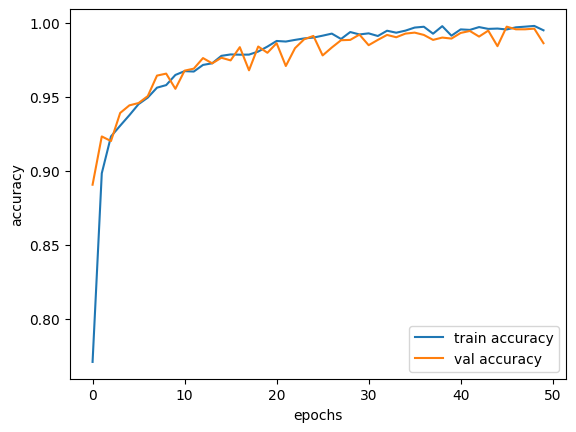

In [159]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

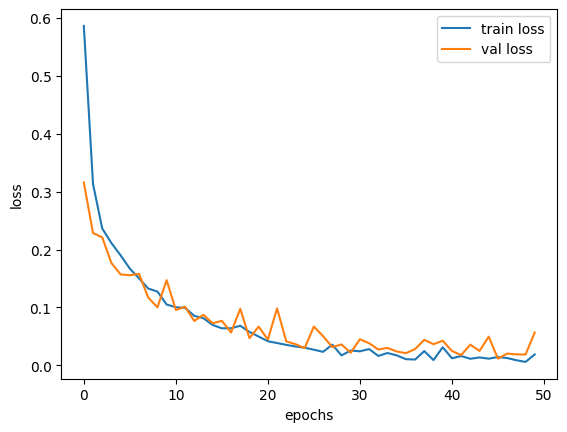

In [160]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()